In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import tree
import pydotplus 
from IPython.display import Image

from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn.metrics import roc_curve, auc  ###计算roc和auc

import warnings
warnings.filterwarnings("ignore")

In [2]:
data_orng = pd.read_csv("wswd_dt_0807.csv",index_col = 0)
data = data_orng.copy()

## 1. Univariate screening and grouping，IV>0.02

In [3]:
#Univariate screening function
def screening(name, show = True, custom = None):
    st = pd.DataFrame()
    
    if isinstance(custom, pd.DataFrame):
        x = custom[name]
    else:
        x = data[name]
    
    if x.isnull().any():
        print('There is missing!')
        return 0,0
    else:
        x_cnt = x.value_counts()
        st['Count'] = x_cnt
        st['Tot Distr'] = x_cnt / x_cnt.sum()

        st['Goods'] = x[data['label'] == 0].value_counts()
        st['Distr Good'] = st['Goods'] / st['Goods'].sum()
        st['Bads'] = x[data['label'] == 1].value_counts()
        st['Distr Bad'] = st['Bads'] / st['Bads'].sum()

        st = st.fillna(0.0001) 
        #如果某组出现响应数为0，目前解决方法是人工设成0.0001，后续会根据实际情况调整分组消除0

        st['Bad rate'] = st['Bads'] / st['Count']

        st['WOE'] = np.log(st['Distr Good']/ st['Distr Bad']) * 100

        IVi = (st['Distr Good'] - st['Distr Bad']) * st['WOE'] / 100
        IV = IVi.sum()

        st.index = list(st.index)
        
        st = st.sort_index()

        st = st.T
        st['Total'] = st.sum(axis = 1)
        st = st.T
        st.loc['Total','Bad rate'] = st.loc['Total','Bads'] / st.loc['Total','Count']
        st.loc['Total','WOE'] = 0

        ##if name in gpList:
        ##    xticks = gpDict[name] + ['Total']
        ##else:
        xticks = list(st.index[:-1])

        if show:
            print('Variable: ',name)
            display(st)
            print('Information Value = ',IV)

            plt.figure(figsize = (10,5))
            plt.grid(True)
            plt.bar(xticks, st['WOE'].values[:-1])
            plt.plot(xticks, st['WOE'].values[:-1],'r')
            plt.xticks(xticks)
            plt.xlabel(name,fontsize = 12)
            plt.ylabel('weight',fontsize = 12)
            plt.show()

        return st, IV

In [4]:
def useTree(name, depth, orng = True):
    if orng:
        dataUsed = data_orng
    else:
        dataUsed = data
    x = np.array([dataUsed[name].values]).T
    y = dataUsed['label'].values
    clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth = depth)
    clf = clf.fit(x, y)
    dot_data = tree.export_graphviz(clf,filled=True,class_names = ['Survived', 'Died'])  
    graph = pydotplus.graph_from_dot_data(dot_data)  
    display(Image(graph.create_png()))

In [5]:
gpDict = {} #存放分组加工对应的信息，变量名：信息
#分组加工默认将缺失值设为0，其他正常的组别按序从1开始赋值
run1Df = pd.DataFrame() #存放第一轮被选中的变量

### x1分析

Variable:  x1


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
1,2550.0,0.352356,2414.0,0.352666,136.0,0.346939,0.053333,1.637362
2,4687.0,0.647644,4431.0,0.647334,256.0,0.653061,0.054619,-0.880877
Total,7237.0,1.000000,6845.0,1.000000,392.0,1.000000,0.054166,0.000000


Information Value =  0.00014422972125065762


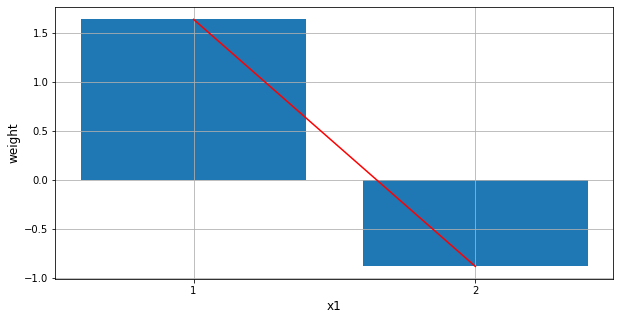

In [6]:
a = screening('x1')

IV不达标，不选。

### x2分析

Variable:  x2


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
1,6368.0,0.879923,6019.0,0.879328,349.0,0.890306,0.054805,-1.240741
2,869.0,0.120077,826.0,0.120672,43.0,0.109694,0.049482,9.538276
Total,7237.0,1.000000,6845.0,1.000000,392.0,1.000000,0.054166,0.000000


Information Value =  0.001183336187957987


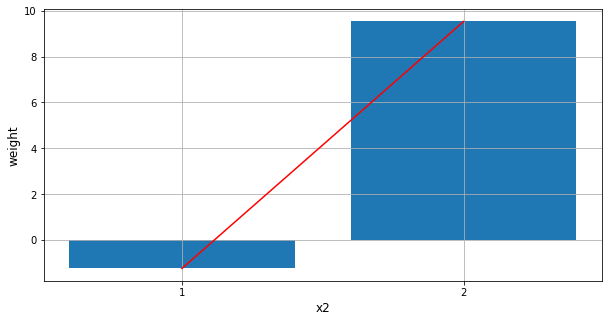

In [7]:
a = screening('x2')

IV不达标，不选。

### x3分析

Variable:  x3


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
1,267.0,0.036894,247.0,0.036085,20.0,0.051020,0.074906,-34.635583
2,694.0,0.095896,656.0,0.095836,38.0,0.096939,0.054755,-1.143727
3,402.0,0.055548,374.0,0.054638,28.0,0.071429,0.069652,-26.796061
4,714.0,0.098660,680.0,0.099343,34.0,0.086735,0.047619,13.572038
5,430.0,0.059417,408.0,0.059606,22.0,0.056122,0.051163,6.021282
6,484.0,0.066879,453.0,0.066180,31.0,0.079082,0.064050,-17.810698
7,1141.0,0.157662,1067.0,0.155880,74.0,0.188776,0.064855,-19.147074
8,806.0,0.111372,762.0,0.111322,44.0,0.112245,0.054591,-0.825498
9,989.0,0.136659,952.0,0.139080,37.0,0.094388,0.037412,38.763522
10,1310.0,0.181014,1246.0,0.182031,64.0,0.163265,0.048855,10.879872


Information Value =  0.03957546147402098


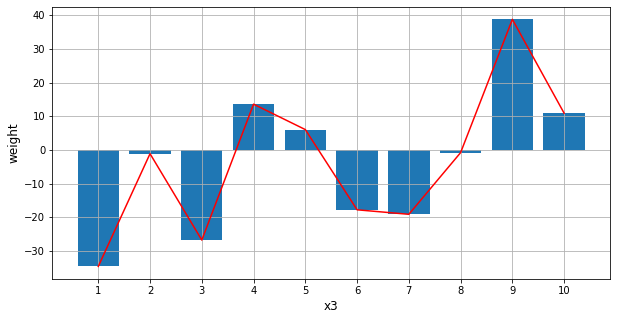

In [8]:
a = screening('x3')

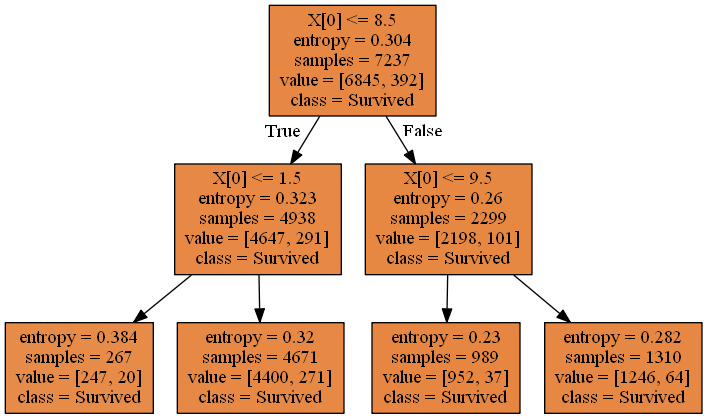

In [9]:
useTree('x3',2)

Variable:  x3


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
a(1),267.0,0.036894,247.0,0.036085,20.0,0.051020,0.074906,-34.635583
b(2-8),4671.0,0.645433,4400.0,0.642805,271.0,0.691327,0.058018,-7.277090
c(9),989.0,0.136659,952.0,0.139080,37.0,0.094388,0.037412,38.763522
d(10),1310.0,0.181014,1246.0,0.182031,64.0,0.163265,0.048855,10.879872
Total,7237.0,1.000000,6845.0,1.000000,392.0,1.000000,0.054166,0.000000


Information Value =  0.028069805580175106


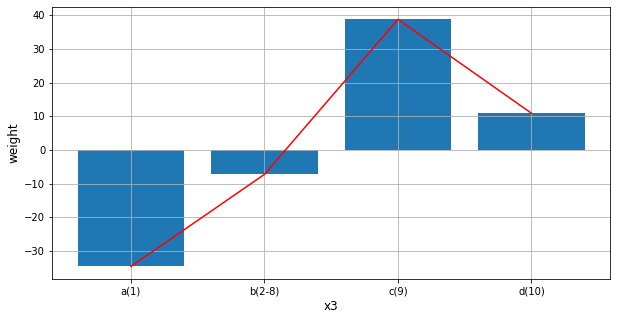

In [10]:
gpBins = [0, 1, 8, 9,100]
gpLabels = ['a(1)','b(2-8)','c(9)','d(10)']
data['x3'] = pd.cut(data_orng['x3'], bins=gpBins, labels=gpLabels)
a = screening('x3')

Variable:  x3


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
a(1),267.0,0.036894,247.0,0.036085,20.0,0.051020,0.074906,-34.635583
a(2-8),4671.0,0.645433,4400.0,0.642805,271.0,0.691327,0.058018,-7.277090
c(9-10),2299.0,0.317673,2198.0,0.321110,101.0,0.257653,0.043932,22.017072
Total,7237.0,1.000000,6845.0,1.000000,392.0,1.000000,0.054166,0.000000


Information Value =  0.022675441748883963


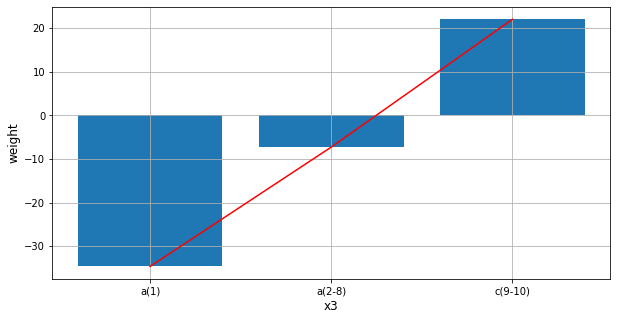

In [11]:
gpBins = [0, 1, 8, 100]
gpLabels = ['a(1)','a(2-8)','c(9-10)']
data['x3'] = pd.cut(data_orng['x3'], bins=gpBins, labels=gpLabels)
a = screening('x3')

Variable:  x3


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
a(1-3),1363.0,0.188338,1277.0,0.18656,86.0,0.219388,0.063096,-16.209034
b(4-8),3575.0,0.493989,3370.0,0.49233,205.0,0.522959,0.057343,-6.035385
c(9-10),2299.0,0.317673,2198.0,0.32111,101.0,0.257653,0.043932,22.017072
Total,7237.0,1.000000,6845.0,1.00000,392.0,1.000000,0.054166,0.000000


Information Value =  0.02114114268286593


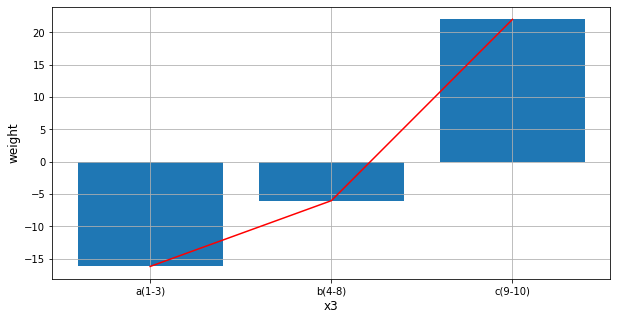

In [12]:
#肉眼分箱试试
gpBins = [0, 3, 8,100]
gpLabels = ['a(1-3)','b(4-8)','c(9-10)']
data['x3'] = pd.cut(data_orng['x3'], bins=gpBins, labels=gpLabels)
a = screening('x3')

IV达标，趋势合理，选入。

In [13]:
gpDict['x3'] = ['bin',gpBins,gpLabels]
run1Df['x3'] = data['x3']

### x4分析

Variable:  x4


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
1,711.0,0.098245,663.0,0.096859,48.0,0.122449,0.067511,-23.443792
2,897.0,0.123946,849.0,0.124032,48.0,0.122449,0.053512,1.284628
3,849.0,0.117314,804.0,0.117458,45.0,0.114796,0.053004,2.292488
4,678.0,0.093685,646.0,0.094375,32.0,0.081633,0.047198,14.505170
5,649.0,0.089678,615.0,0.089847,34.0,0.086735,0.052388,3.524985
6,3453.0,0.477131,3268.0,0.477429,185.0,0.471939,0.053577,1.156573
Total,7237.0,1.000000,6845.0,1.000000,392.0,1.000000,0.054166,0.000000


Information Value =  0.008102177782287147


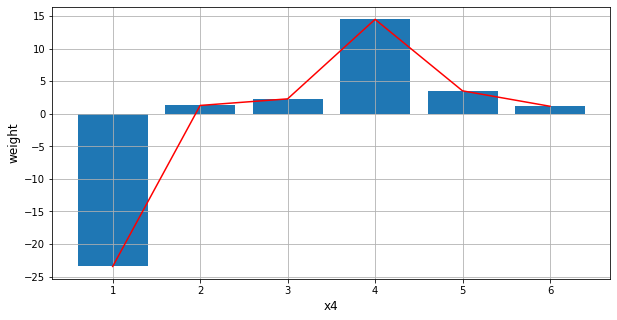

In [14]:
a = screening('x4')

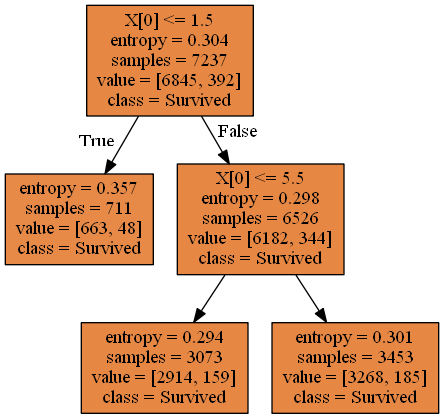

In [15]:
useTree('x4',2)

Variable:  x4


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
a(1),711.0,0.098245,663.0,0.096859,48.0,0.122449,0.067511,-23.443792
b(2-5),3073.0,0.424623,2914.0,0.425712,159.0,0.405612,0.051741,4.836589
c(6),3453.0,0.477131,3268.0,0.477429,185.0,0.471939,0.053577,1.156573
Total,7237.0,1.000000,6845.0,1.000000,392.0,1.000000,0.054166,0.000000


Information Value =  0.007034904600777473


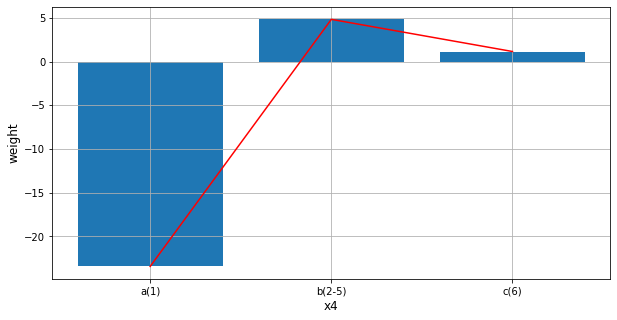

In [16]:
gpBins = [0, 1, 5, 100]
gpLabels = ['a(1)','b(2-5)','c(6)']
data['x4'] = pd.cut(data_orng['x4'], bins=gpBins, labels=gpLabels, include_lowest=True)
a = screening('x4')

Variable:  x4


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
a(1),711.0,0.098245,663.0,0.096859,48.0,0.122449,0.067511,-23.443792
b(2-6),6526.0,0.901755,6182.0,0.903141,344.0,0.877551,0.052712,2.874357
Total,7237.0,1.000000,6845.0,1.000000,392.0,1.000000,0.054166,0.000000


Information Value =  0.006734803281666213


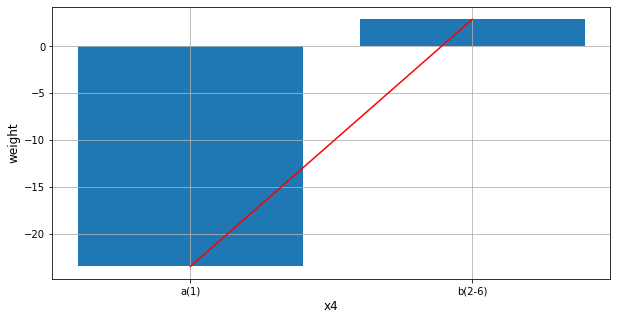

In [17]:
gpBins = [0, 1, 100]
gpLabels = ['a(1)','b(2-6)']
data['x4'] = pd.cut(data_orng['x4'], bins=gpBins, labels=gpLabels)
a = screening('x4')

Variable:  x4


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
a(1),711.0,0.098245,663.0,0.096859,48.0,0.122449,0.067511,-23.443792
b(2-3),1746.0,0.241260,1653.0,0.241490,93.0,0.237245,0.053265,1.773571
c(4-6),4780.0,0.660495,4529.0,0.661651,251.0,0.640306,0.052510,3.279161
Total,7237.0,1.000000,6845.0,1.000000,392.0,1.000000,0.054166,0.000000


Information Value =  0.006774476513665673


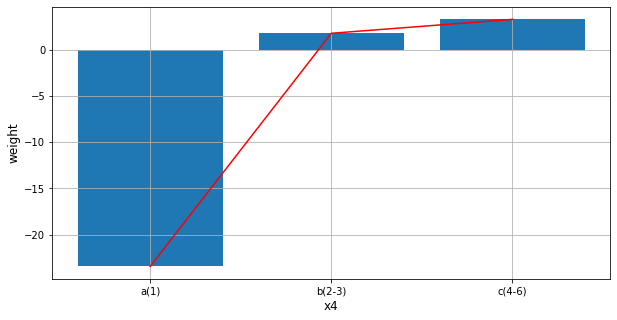

In [18]:
#肉眼分箱试试
gpBins = [0, 1, 3,100]
gpLabels = ['a(1)','b(2-3)','c(4-6)']
data['x4'] = pd.cut(data_orng['x4'], bins=gpBins, labels=gpLabels)
a = screening('x4')

IV不达标，不选。

### x5分析

Variable:  x5


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
1,234.0,0.032334,215.0,0.031410,19.0,0.048469,0.081197,-43.381285
2,1763.0,0.243609,1685.0,0.246165,78.0,0.198980,0.044243,21.280012
3,1501.0,0.207406,1429.0,0.208766,72.0,0.183673,0.047968,12.805216
4,1051.0,0.145226,992.0,0.144923,59.0,0.150510,0.056137,-3.782623
5,880.0,0.121597,839.0,0.122571,41.0,0.104592,0.046591,15.862674
6,574.0,0.079315,539.0,0.078744,35.0,0.089286,0.060976,-12.564439
7,424.0,0.058588,391.0,0.057122,33.0,0.084184,0.077830,-38.781190
8,302.0,0.041730,283.0,0.041344,19.0,0.048469,0.062914,-15.900398
9,258.0,0.035650,238.0,0.034770,20.0,0.051020,0.077519,-38.347350
10,250.0,0.034545,234.0,0.034186,16.0,0.040816,0.064000,-17.727950


Information Value =  0.04407768433196444


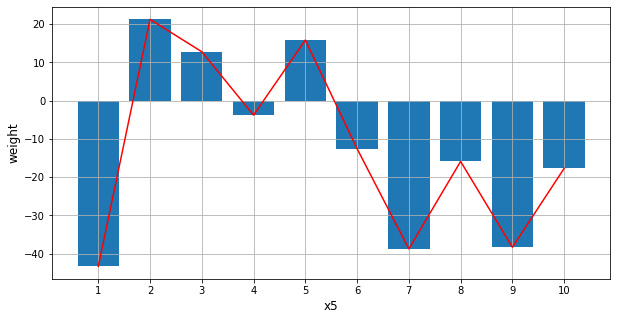

In [19]:
a = screening('x5')

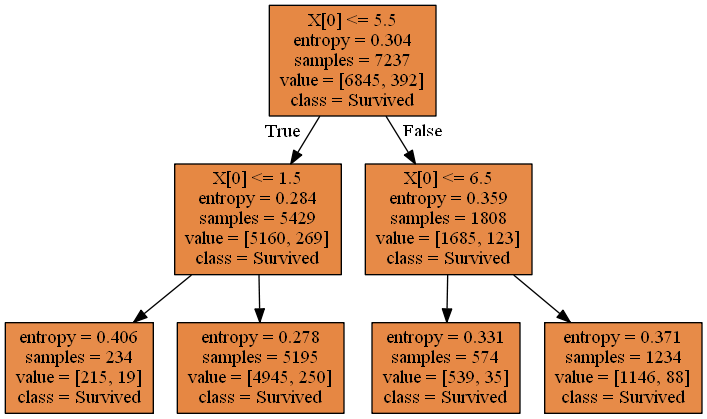

In [20]:
useTree('x5',2)

Variable:  x5


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
a(1),234.0,0.032334,215.0,0.031410,19.0,0.048469,0.081197,-43.381285
b(2-5),5195.0,0.717839,4945.0,0.722425,250.0,0.637755,0.048123,12.465943
c(6),574.0,0.079315,539.0,0.078744,35.0,0.089286,0.060976,-12.564439
d(7-10),1234.0,0.170513,1146.0,0.167421,88.0,0.224490,0.071313,-29.331582
Total,7237.0,1.000000,6845.0,1.000000,392.0,1.000000,0.054166,0.000000


Information Value =  0.036019187857415896


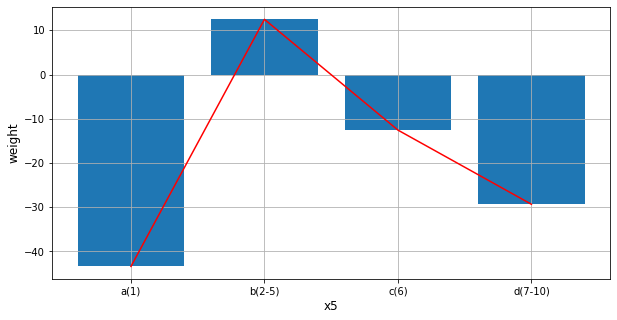

In [21]:
gpBins = [0, 1, 5, 6,100]
gpLabels = ['a(1)','b(2-5)','c(6)','d(7-10)']
data['x5'] = pd.cut(data_orng['x5'], bins=gpBins, labels=gpLabels)
a = screening('x5')

消费档次过高和过低都会提高逾期概率，所以把1调整位置是合理的。

Variable:  x5


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
a(2-5),5769.0,0.797154,5484.0,0.801169,285.0,0.727041,0.049402,9.708896
b(6-10),1234.0,0.170513,1146.0,0.167421,88.0,0.224490,0.071313,-29.331582
c(1),234.0,0.032334,215.0,0.031410,19.0,0.048469,0.081197,-43.381285
Total,7237.0,1.000000,6845.0,1.000000,392.0,1.000000,0.054166,0.000000


Information Value =  0.03133671725457958


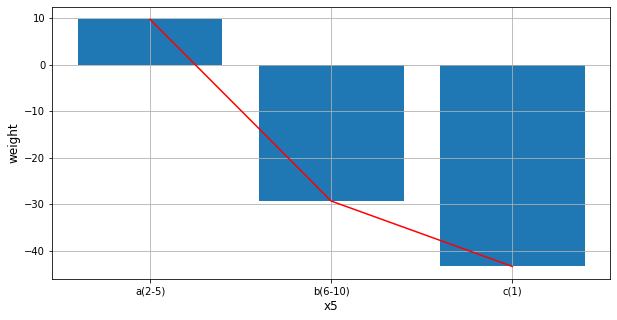

In [22]:
#调整合并
gpBins = [0, 1, 6,100]
gpLabels = ['c(1)','a(2-5)','b(6-10)']
data['x5'] = pd.cut(data_orng['x5'], bins=gpBins, labels=gpLabels)
a = screening('x5')

Variable:  x5


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
a(1-5),5429.0,0.750173,5160.0,0.753835,269.0,0.686224,0.049549,9.396858
b(6-10),1808.0,0.249827,1685.0,0.246165,123.0,0.313776,0.068031,-24.267541
Total,7237.0,1.000000,6845.0,1.000000,392.0,1.000000,0.054166,0.000000


Information Value =  0.022760643740651607


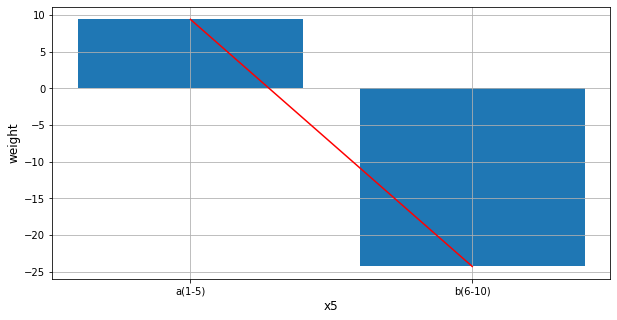

In [23]:
#调整合并,1并到一起是因为可能由于变量过少。。因为1的bad rate虽然高但也不是特别高
gpBins = [0, 5, 100]
gpLabels = ['a(1-5)','b(6-10)']
data['x5'] = pd.cut(data_orng['x5'], bins=gpBins, labels=gpLabels)
a = screening('x5')

Variable:  x5


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
a(1-3),3498.0,0.483349,3329.0,0.486340,169.0,0.431122,0.048313,12.051662
b(4-6),2505.0,0.346138,2370.0,0.346238,135.0,0.344388,0.053892,0.535856
c(7-10),1234.0,0.170513,1146.0,0.167421,88.0,0.224490,0.071313,-29.331582
Total,7237.0,1.000000,6845.0,1.000000,392.0,1.000000,0.054166,0.000000


Information Value =  0.023403636666018135


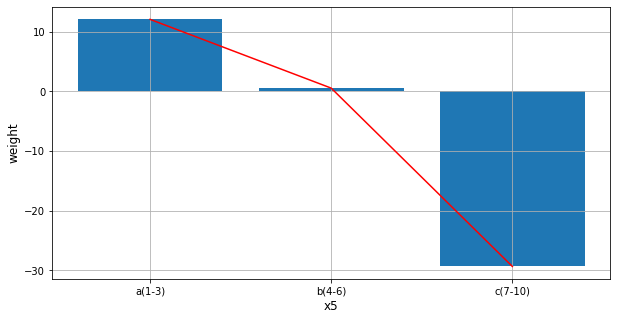

In [24]:
#调整合并,1并到一起是因为可能由于变量过少。。因为1的bad rate虽然高但也不是特别高
gpBins = [0, 3,6, 100]
gpLabels = ['a(1-3)','b(4-6)','c(7-10)']
data['x5'] = pd.cut(data_orng['x5'], bins=gpBins, labels=gpLabels)
a = screening('x5')

保持合格IV，可以选入。

In [25]:
gpDict['x5'] = ['bin',gpBins,gpLabels]
run1Df['x5'] = data['x5']

### x6分析

Variable:  x6


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
1,9.0,0.001244,9.0,0.001315,0.0001,0.000100,0.000011,257.629121
2,160.0,0.022109,154.0,0.022498,6.0000,0.015306,0.037500,38.518124
3,302.0,0.041730,281.0,0.041052,21.0000,0.053571,0.069536,-26.617967
4,391.0,0.054028,371.0,0.054200,20.0000,0.051020,0.051151,6.045789
5,449.0,0.062042,423.0,0.061797,26.0000,0.066327,0.057906,-7.073626
6,395.0,0.054581,365.0,0.053324,30.0000,0.076531,0.075949,-36.131193
7,446.0,0.061628,426.0,0.062235,20.0000,0.051020,0.044843,19.869517
8,541.0,0.074755,515.0,0.075237,26.0000,0.066327,0.048059,12.605846
9,1549.0,0.214039,1462.0,0.213587,87.0000,0.221939,0.056165,-3.835938
10,2995.0,0.413846,2839.0,0.414755,156.0000,0.397959,0.052087,4.133925


Information Value =  0.022496409905967994


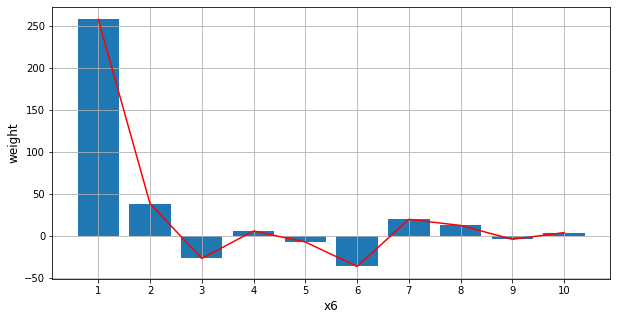

In [26]:
a = screening('x6')

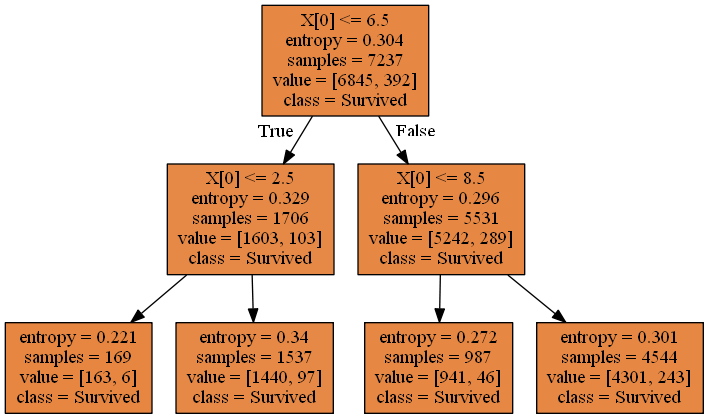

In [27]:
useTree('x6',2)

Variable:  x6


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
a(1-2),169.0,0.023352,163.0,0.023813,6.0,0.015306,0.035503,44.197883
b(3-6),1537.0,0.212381,1440.0,0.210373,97.0,0.247449,0.063110,-16.232448
c(7-8),987.0,0.136382,941.0,0.137473,46.0,0.117347,0.046606,15.828985
d(9-10),4544.0,0.627884,4301.0,0.628342,243.0,0.619898,0.053477,1.352949
Total,7237.0,1.000000,6845.0,1.000000,392.0,1.000000,0.054166,0.000000


Information Value =  0.013078206214089465


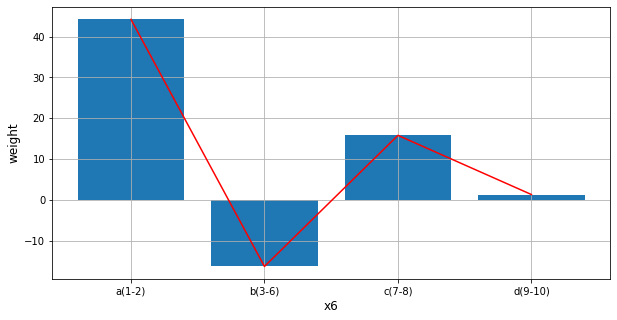

In [28]:
gpBins = [0, 2, 6, 8,100]
gpLabels = ['a(1-2)','b(3-6)','c(7-8)','d(9-10)']
data['x6'] = pd.cut(data_orng['x6'], bins=gpBins, labels=gpLabels)
a = screening('x6')

IV不达标，趋势不合理，不选。

### x7分析

Variable:  x7


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
1,363.0,0.050159,344.0,0.050256,19.0,0.048469,0.052342,3.619078
2,297.0,0.041039,287.0,0.041928,10.0,0.025510,0.033670,49.688522
3,1788.0,0.247064,1677.0,0.244996,111.0,0.283163,0.062081,-14.478034
4,1210.0,0.167196,1140.0,0.166545,70.0,0.178571,0.057851,-6.972360
5,1306.0,0.180462,1235.0,0.180424,71.0,0.181122,0.054364,-0.386553
6,1481.0,0.204643,1405.0,0.205259,76.0,0.193878,0.051317,5.704734
7,331.0,0.045737,320.0,0.046749,11.0,0.028061,0.033233,51.041383
8,264.0,0.036479,249.0,0.036377,15.0,0.038265,0.056818,-5.060920
9,142.0,0.019621,135.0,0.019722,7.0,0.017857,0.049296,9.935273
10,55.0,0.007600,53.0,0.007743,2.0,0.005102,0.036364,41.713284


Information Value =  0.02616016430783689


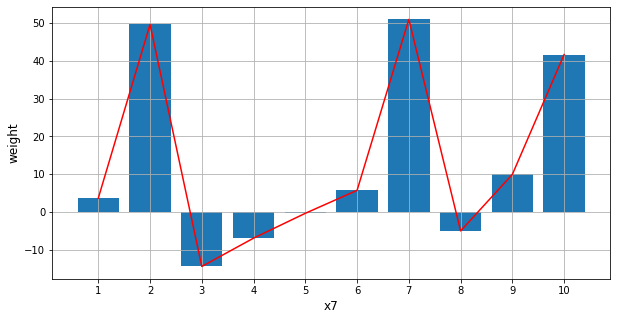

In [29]:
a = screening('x7')

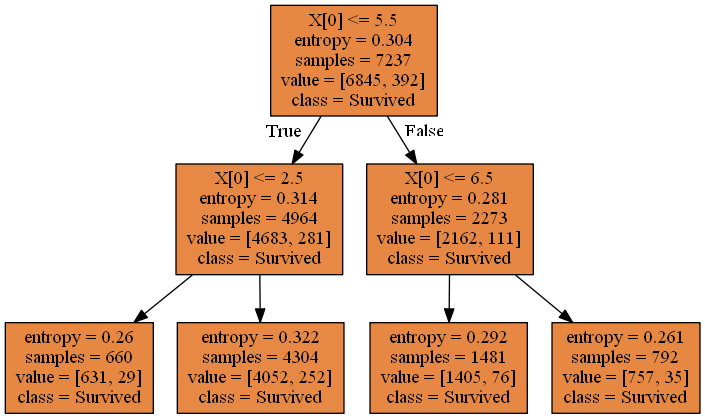

In [30]:
useTree('x7',2)

Variable:  x7


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
a(1-2),660.0,0.091198,631.0,0.092184,29.0,0.073980,0.043939,21.999813
b(3-5),4304.0,0.594722,4052.0,0.591965,252.0,0.642857,0.058550,-8.247512
c(6),1481.0,0.204643,1405.0,0.205259,76.0,0.193878,0.051317,5.704734
d(7-10),792.0,0.109438,757.0,0.110592,35.0,0.089286,0.044192,21.400329
Total,7237.0,1.000000,6845.0,1.000000,392.0,1.000000,0.054166,0.000000


Information Value =  0.01341113786558898


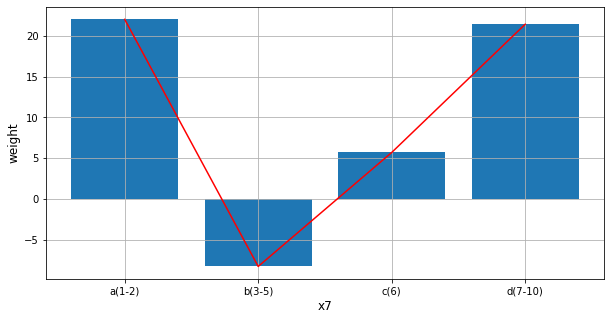

In [31]:
gpBins = [0, 2, 5, 6,100]
gpLabels = ['a(1-2)','b(3-5)','c(6)','d(7-10)']
data['x7'] = pd.cut(data_orng['x7'], bins=gpBins, labels=gpLabels)
a = screening('x7')

IV不达标，趋势不合理，不选。

### x8分析

Variable:  x8


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
1,55.0,0.007600,52.0,0.007597,3.0,0.007653,0.054545,-0.738047
2,111.0,0.015338,107.0,0.015632,4.0,0.010204,0.036036,42.652258
3,160.0,0.022109,156.0,0.022790,4.0,0.010204,0.025000,80.354975
4,202.0,0.027912,197.0,0.028780,5.0,0.012755,0.024752,81.375392
5,205.0,0.028327,192.0,0.028050,13.0,0.033163,0.063415,-16.746588
6,1253.0,0.173138,1204.0,0.175895,49.0,0.125000,0.039106,34.157243
7,1014.0,0.140113,957.0,0.139810,57.0,0.145408,0.056213,-3.925977
8,1806.0,0.249551,1712.0,0.250110,94.0,0.239796,0.052049,4.211088
9,1078.0,0.148957,1000.0,0.146092,78.0,0.198980,0.072356,-30.896545
10,1353.0,0.186956,1268.0,0.185245,85.0,0.216837,0.062823,-15.746702


Information Value =  0.06567945350312183


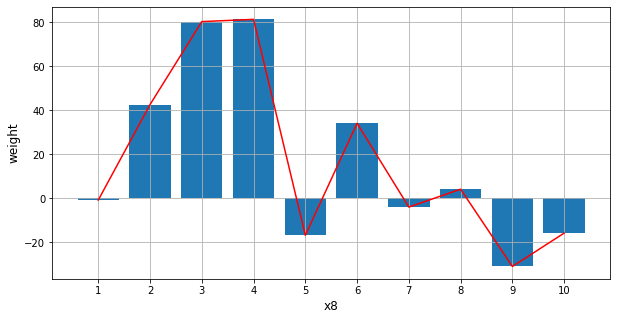

In [32]:
a = screening('x8')

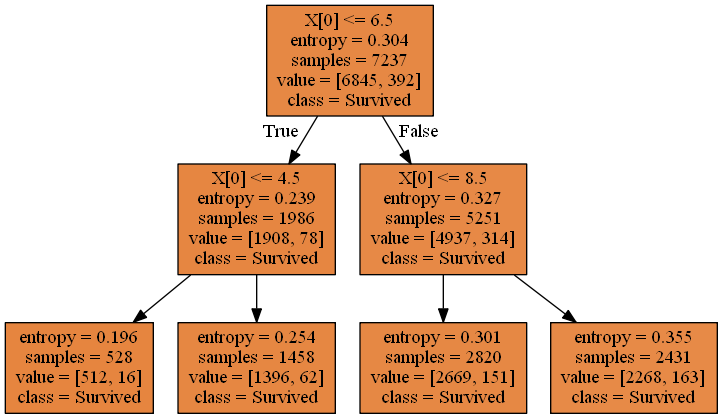

In [33]:
useTree('x8',2)

Variable:  x8


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
a(1-4),528.0,0.072958,512.0,0.074799,16.0,0.040816,0.030303,60.572400
b(5-6),1458.0,0.201465,1396.0,0.203944,62.0,0.158163,0.042524,25.422000
c(7-8),2820.0,0.389664,2669.0,0.389920,151.0,0.385204,0.053546,1.216741
d(9-10),2431.0,0.335913,2268.0,0.331337,163.0,0.415816,0.067051,-22.710843
Total,7237.0,1.000000,6845.0,1.000000,392.0,1.000000,0.054166,0.000000


Information Value =  0.05146609991127697


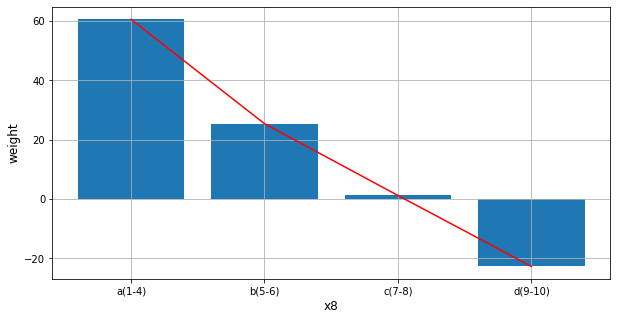

In [34]:
gpBins = [0, 4, 6, 8,100]
gpLabels = ['a(1-4)','b(5-6)','c(7-8)','d(9-10)']
data['x8'] = pd.cut(data_orng['x8'], bins=gpBins, labels=gpLabels)
a = screening('x8')

IV达标，趋势合理，选入。

In [35]:
gpDict['x8'] = ['bin',gpBins,gpLabels]
run1Df['x8'] = data['x8']

### x9分析

Variable:  x9


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
A,1087.0,0.150200,1026.0,0.149890,61.0,0.155612,0.056118,-3.746274
B,2635.0,0.364101,2499.0,0.365084,136.0,0.346939,0.051613,5.097915
C,2413.0,0.333425,2290.0,0.334551,123.0,0.313776,0.050974,6.411084
D,1102.0,0.152273,1030.0,0.150475,72.0,0.183673,0.065336,-19.936394
Total,7237.0,1.000000,6845.0,1.000000,392.0,1.000000,0.054166,0.000000


Information Value =  0.009089919820730857


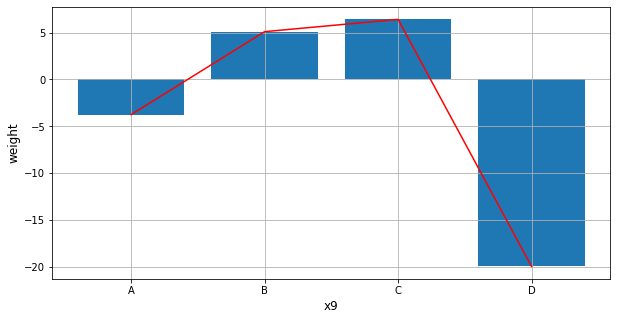

In [36]:
a = screening('x9')

Variable:  x9


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
a,2189.0,0.302473,2056.0,0.300365,133.0,0.339286,0.060758,-12.184340
b,2635.0,0.364101,2499.0,0.365084,136.0,0.346939,0.051613,5.097915
c,2413.0,0.333425,2290.0,0.334551,123.0,0.313776,0.050974,6.411084
Total,7237.0,1.000000,6845.0,1.000000,392.0,1.000000,0.054166,0.000000


Information Value =  0.006999151556362326


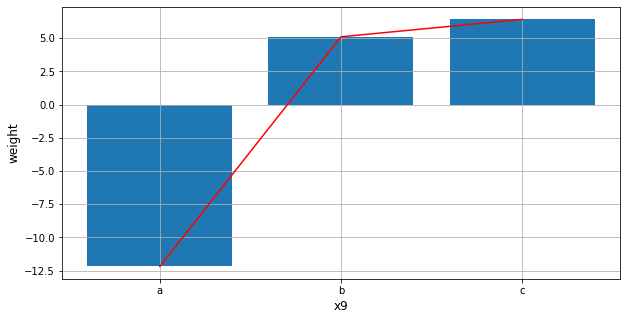

In [37]:
data['x9'] = data_orng['x9'].apply(lambda x: 'a' if x == 'A' or x == 'D' else ('b' if x == 'B' else 'c') )
a = screening('x9')

Variable:  x9


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
a,2189.0,0.302473,2056.0,0.300365,133.0,0.339286,0.060758,-12.184340
b,5048.0,0.697527,4789.0,0.699635,259.0,0.660714,0.051307,5.723694
Total,7237.0,1.000000,6845.0,1.000000,392.0,1.000000,0.054166,0.000000


Information Value =  0.006969893553122916


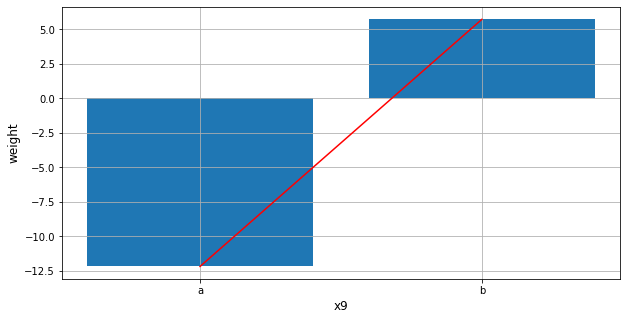

In [38]:
data['x9'] = data_orng['x9'].apply(lambda x: 'a' if x == 'A' or x == 'D' else 'b')
a = screening('x9')

IV不达标，不选。

### x10分析

Variable:  x10


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
A,251.0,0.034683,246.0,0.035939,5.0,0.012755,0.019920,103.588173
B,820.0,0.113307,797.0,0.116435,23.0,0.058673,0.028049,68.534856
C,1055.0,0.145779,1003.0,0.146530,52.0,0.132653,0.049289,9.949517
D,5111.0,0.706232,4799.0,0.701096,312.0,0.795918,0.061045,-12.685224
Total,7237.0,1.000000,6845.0,1.000000,392.0,1.000000,0.054166,0.000000


Information Value =  0.0770116186222059


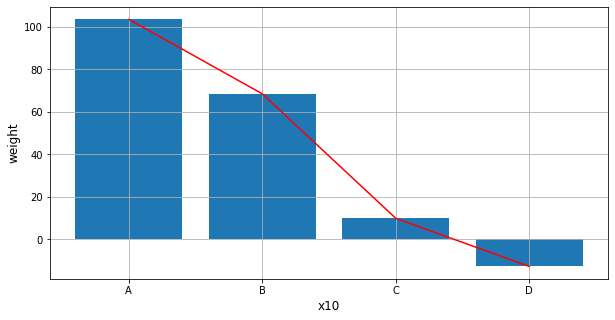

In [39]:
a = screening('x10')

IV达标，趋势合理，选入。

In [40]:
run1Df['x10'] = data['x10']

### x11分析

Variable:  x11


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
A,75.0,0.010363,72.0,0.010519,3.0,0.007653,0.040000,31.804193
B,681.0,0.094100,644.0,0.094083,37.0,0.094388,0.054332,-0.323108
C,6155.0,0.850491,5827.0,0.851278,328.0,0.836735,0.053290,1.723206
D,326.0,0.045046,302.0,0.044120,24.0,0.061224,0.073620,-32.763871
Total,7237.0,1.000000,6845.0,1.000000,392.0,1.000000,0.054166,0.000000


Information Value =  0.006767130197734543


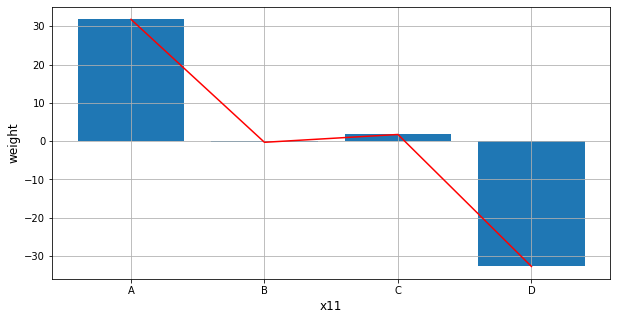

In [41]:
a = screening('x11')

Variable:  x11


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
a,75.0,0.010363,72.0,0.010519,3.0,0.007653,0.040000,31.804193
b,6836.0,0.944590,6471.0,0.945362,365.0,0.931122,0.053394,1.517668
c,326.0,0.045046,302.0,0.044120,24.0,0.061224,0.073620,-32.763871
Total,7237.0,1.000000,6845.0,1.000000,392.0,1.000000,0.054166,0.000000


Information Value =  0.006731632743311955


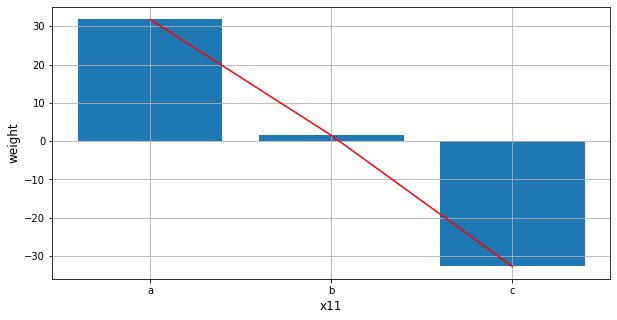

In [42]:
data['x11'] = data_orng['x11'].apply(lambda x: 'a' if x == 'A' else ('c' if x == 'D' else 'b'))
a = screening('x11')

Variable:  x11


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
a,6911.0,0.954954,6543.0,0.95588,368.0,0.938776,0.053248,1.805622
b,326.0,0.045046,302.0,0.04412,24.0,0.061224,0.073620,-32.763871
Total,7237.0,1.000000,6845.0,1.00000,392.0,1.000000,0.054166,0.000000


Information Value =  0.0059130061016951785


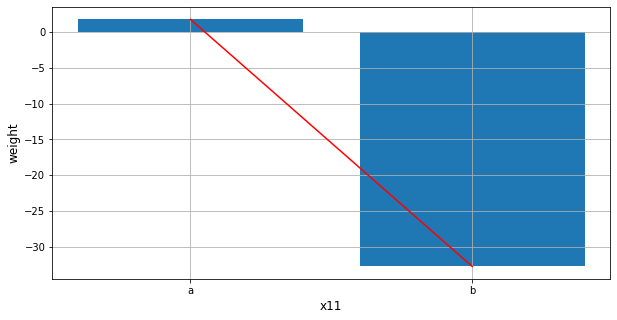

In [43]:
data['x11'] = data_orng['x11'].apply(lambda x: 'b' if x == 'D' else 'a')
a = screening('x11')

IV不达标，不选。

### x12分析

Variable:  x12


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
1,1036.0,0.143153,1024.0,0.149598,12.0000,0.030612,0.011583,158.655326
2,1692.0,0.233799,1639.0,0.239445,53.0000,0.135204,0.031324,57.153777
3,1961.0,0.270969,1831.0,0.267495,130.0000,0.331633,0.066293,-21.492880
4,1292.0,0.178527,1197.0,0.174872,95.0000,0.242347,0.073529,-32.631508
5,1047.0,0.144673,961.0,0.140394,86.0000,0.219388,0.082139,-44.638479
6,204.0,0.028188,188.0,0.027465,16.0000,0.040816,0.078431,-39.615866
7,5.0,0.000691,5.0,0.000730,0.0001,0.000100,0.000020,198.850455
Total,7237.0,1.000000,6845.0,1.000000,392.0001,1.000100,0.054166,0.000000


Information Value =  0.32596253881329057


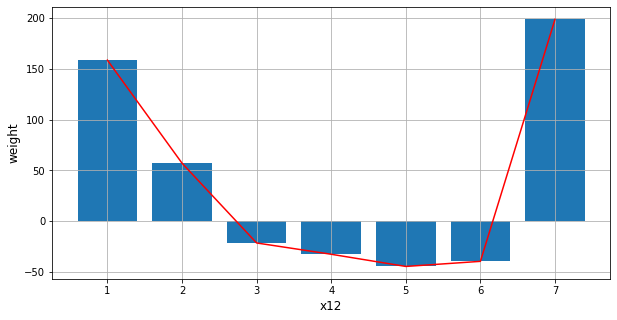

In [44]:
a = screening('x12')

Variable:  x12


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
a,1036.0,0.143153,1024.0,0.149598,12.0,0.030612,0.011583,158.655326
b,1692.0,0.233799,1639.0,0.239445,53.0,0.135204,0.031324,57.153777
c,1961.0,0.270969,1831.0,0.267495,130.0,0.331633,0.066293,-21.492880
d,1292.0,0.178527,1197.0,0.174872,95.0,0.242347,0.073529,-32.631508
e,1256.0,0.173553,1154.0,0.168590,102.0,0.260204,0.081210,-43.399526
Total,7237.0,1.000000,6845.0,1.000000,392.0,1.000000,0.054166,0.000000


Information Value =  0.3239183177822468


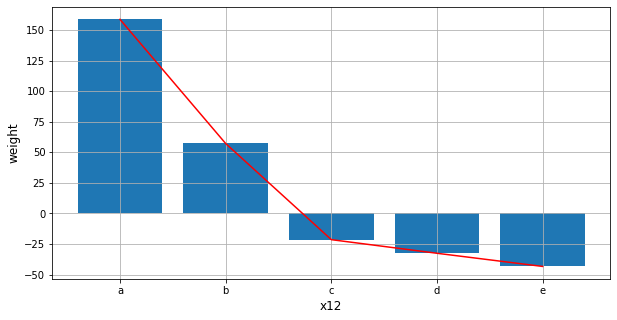

In [45]:
x12_map = {1:'a', 2:'b', 3:'c', 4:'d', 5:'e', 6:'e', 7:'e'}
data['x12'] = data_orng['x12'].copy().map(x12_map)
a = screening('x12')

IV达标，趋势合理，选入。

In [46]:
gpDict['x12'] = ['map', x12_map]
run1Df['x12'] = data['x12']

### x13分析

In [47]:
a = screening('x13')

There is missing!


In [48]:
data['x13'] = data_orng['x13'].fillna(20060000)

Variable:  x13


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
20060000.0,6505.0,0.898853,6140.0000,0.897005,365.0000,0.931122,0.056111,-3.732923
20060523.0,1.0,0.000138,1.0000,0.000146,0.0001,0.000100,0.000100,37.906663
20061028.0,1.0,0.000138,1.0000,0.000146,0.0001,0.000100,0.000100,37.906663
20061030.0,1.0,0.000138,1.0000,0.000146,0.0001,0.000100,0.000100,37.906663
20070115.0,1.0,0.000138,1.0000,0.000146,0.0001,0.000100,0.000100,37.906663
...,...,...,...,...,...,...,...,...
20190719.0,1.0,0.000138,1.0000,0.000146,0.0001,0.000100,0.000100,37.906663
20190806.0,1.0,0.000138,1.0000,0.000146,0.0001,0.000100,0.000100,37.906663
20190809.0,1.0,0.000138,1.0000,0.000146,0.0001,0.000100,0.000100,37.906663
20190814.0,1.0,0.000138,1.0000,0.000146,0.0001,0.000100,0.000100,37.906663


Information Value =  0.2375535467679093


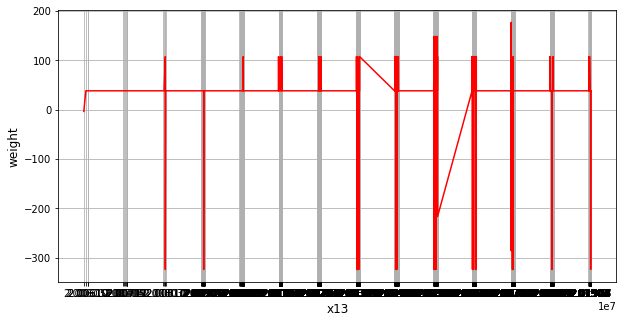

In [49]:
a = screening('x13')

这个日期真不知道咋分析

### x14分析

Variable:  x14


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
1,2011.0,0.277878,1873.0,0.273630,138.0000,0.352041,0.068623,-25.196888
"1,2",102.0,0.014094,95.0,0.013879,7.0000,0.017857,0.068627,-25.204516
"1,2,3",5.0,0.000691,5.0,0.000730,0.0001,0.000100,0.000020,198.850455
"1,2,3,5",14.0,0.001935,14.0,0.002045,0.0001,0.000100,0.000007,301.812396
"1,2,3,6",1.0,0.000138,1.0,0.000146,0.0001,0.000100,0.000100,37.906663
"1,2,5",91.0,0.012574,87.0,0.012710,4.0000,0.010204,0.043956,21.960186
"1,2,5,6",17.0,0.002349,17.0,0.002484,0.0001,0.000100,0.000006,321.227998
"1,2,6",21.0,0.002902,21.0,0.003068,0.0001,0.000100,0.000005,342.358907
"1,3",159.0,0.021970,152.0,0.022206,7.0000,0.017857,0.044025,21.795847
"1,3,5",79.0,0.010916,73.0,0.010665,6.0000,0.015306,0.075949,-36.131193


Information Value =  0.20112434730875609


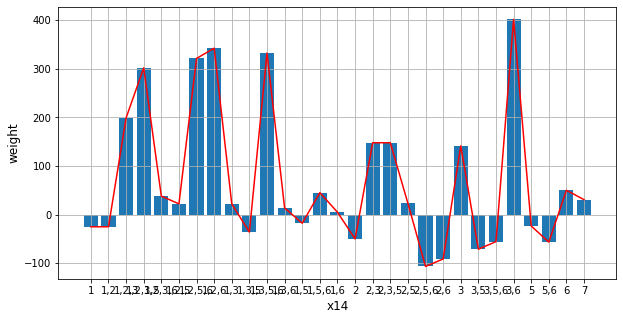

In [50]:
a = screening('x14')

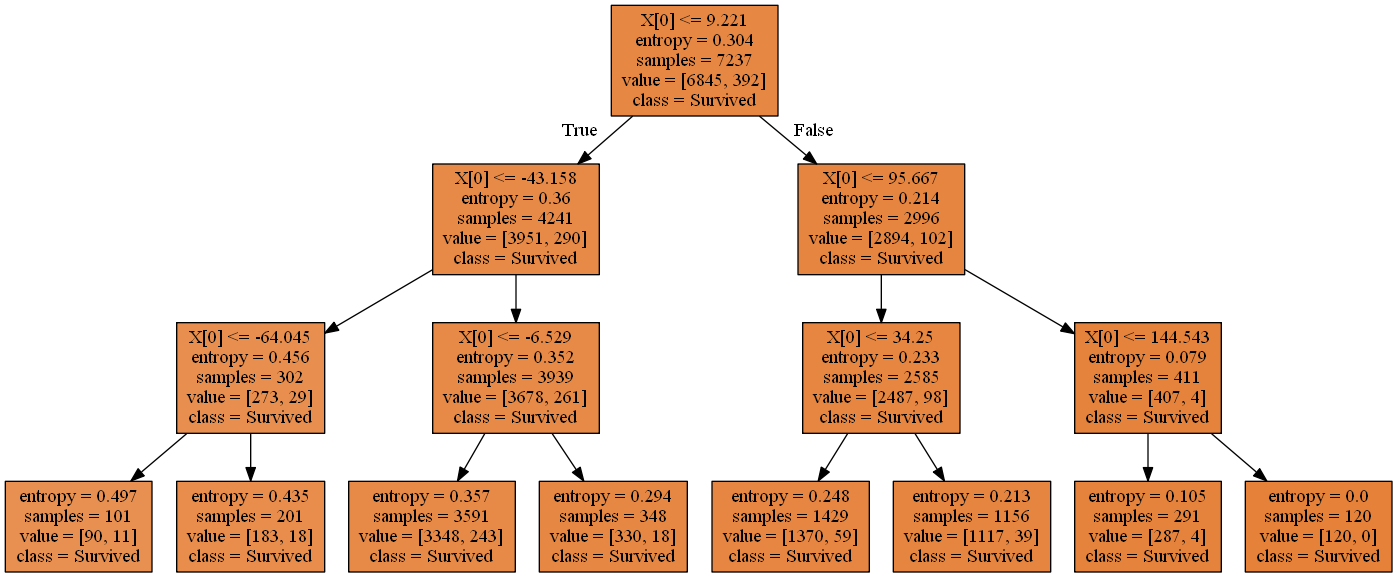

In [51]:
deepAnlys = a[0].iloc[:-1,:].sort_values('WOE')
x14_map_1 = dict(zip(list(deepAnlys.index),list(deepAnlys['WOE'].values))) #每组赋予WOE的值
data_x14 = data_orng['x14'].copy().map(x14_map_1)
data['x14'] = data_x14
useTree('x14', 3, False)

Variable:  x14


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
a,101.0,0.013956,90.0,0.013148,11.0,0.028061,0.108911,-75.809750
b,201.0,0.027774,183.0,0.026735,18.0,0.045918,0.089552,-54.089750
c,3591.0,0.496200,3348.0,0.489116,243.0,0.619898,0.067669,-23.695491
d,348.0,0.048086,330.0,0.048210,18.0,0.045918,0.051724,4.870900
e,1429.0,0.197458,1370.0,0.200146,59.0,0.150510,0.041288,28.501668
f,1156.0,0.159735,1117.0,0.163185,39.0,0.099490,0.033737,49.482826
g,291.0,0.040210,287.0,0.041928,4.0,0.010204,0.013746,141.317596
h,120.0,0.016581,120.0,0.017531,0.0,0.000000,0.000000,inf
Total,7237.0,1.000000,6845.0,1.000000,392.0,1.000000,0.054166,0.000000


Information Value =  inf


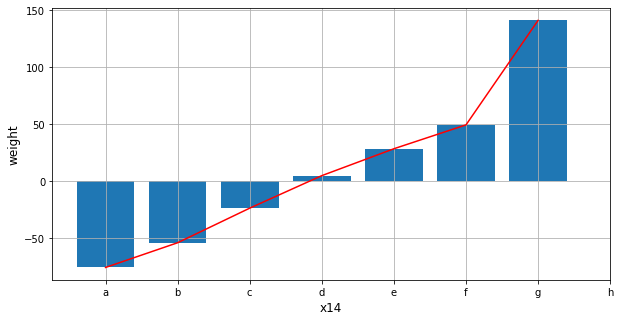

In [52]:
gpBins = [-10000, -64.045, -43.158, -6.529, 9.221,34.25, 95.667, 144.543, 10000]
gpLabels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']
data['x14'] = pd.cut(data_x14, bins=gpBins, labels=gpLabels)
a = screening('x14')

Variable:  x14


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
a,302.0,0.041730,273.0,0.039883,29.0,0.073980,0.096026,-61.783593
b,3591.0,0.496200,3348.0,0.489116,243.0,0.619898,0.067669,-23.695491
c,348.0,0.048086,330.0,0.048210,18.0,0.045918,0.051724,4.870900
d,2585.0,0.357192,2487.0,0.363331,98.0,0.250000,0.037911,37.385307
e,411.0,0.056791,407.0,0.059459,4.0,0.010204,0.009732,176.250693
Total,7237.0,1.000000,6845.0,1.000000,392.0,1.000000,0.054166,0.000000


Information Value =  0.1813491048033016


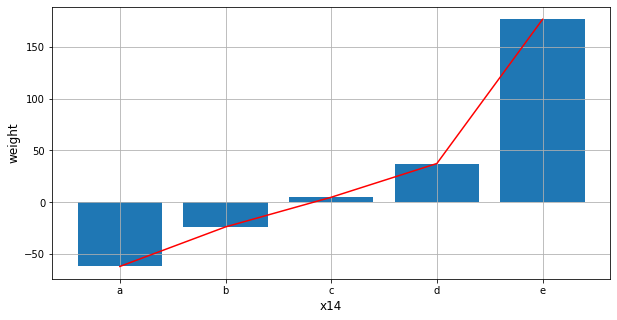

In [53]:
gpBins = [-10000, -43.158, -6.529, 9.221,95.667, 10000]
gpLabels = ['a', 'b', 'c', 'd', 'e']
data['x14'] = pd.cut(data_x14, bins=gpBins, labels=gpLabels)
a = screening('x14')

In [54]:
x14_mapDf = pd.concat([data_orng['x14'],data['x14']],axis = 1).drop_duplicates()
x14_map_2 = dict(zip(list(x14_mapDf.iloc[:,0].values),list(x14_mapDf.iloc[:,1].values)))

Variable:  x14


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
a,302.0,0.041730,273.0,0.039883,29.0,0.073980,0.096026,-61.783593
b,3591.0,0.496200,3348.0,0.489116,243.0,0.619898,0.067669,-23.695491
c,348.0,0.048086,330.0,0.048210,18.0,0.045918,0.051724,4.870900
d,2585.0,0.357192,2487.0,0.363331,98.0,0.250000,0.037911,37.385307
e,411.0,0.056791,407.0,0.059459,4.0,0.010204,0.009732,176.250693
Total,7237.0,1.000000,6845.0,1.000000,392.0,1.000000,0.054166,0.000000


Information Value =  0.1813491048033016


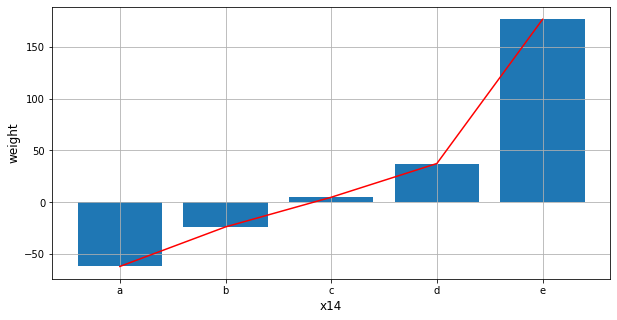

In [55]:
#检验一下没有搞错
data['x14'] = data_orng['x14'].copy().map(x14_map_2)
a = screening('x14')

IV达标，趋势合理，但是不方便解释，暂时不选入。

In [56]:
#gpDict['x14'] = ['map',x14_map_2]
#run1Df['x14'] = data['x14']

### x15分析

Variable:  x15


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
1,112.0,0.015476,107.0,0.015632,5.0,0.012755,0.044643,20.337902
2,269.0,0.037170,249.0,0.036377,20.0,0.051020,0.074349,-33.829128
3,123.0,0.016996,114.0,0.016654,9.0,0.022959,0.073171,-32.103803
4,99.0,0.013680,91.0,0.013294,8.0,0.020408,0.080808,-42.859393
5,141.0,0.019483,132.0,0.019284,9.0,0.022959,0.063830,-17.443455
6,180.0,0.024872,169.0,0.024690,11.0,0.028061,0.061111,-12.800846
7,196.0,0.027083,180.0,0.026297,16.0,0.040816,0.081633,-43.964377
8,248.0,0.034268,229.0,0.033455,19.0,0.048469,0.076613,-37.072887
9,294.0,0.040625,283.0,0.041344,11.0,0.028061,0.037415,38.753973
10,5575.0,0.770347,5291.0,0.772973,284.0,0.724490,0.050942,6.477641


Information Value =  0.03192241002884186


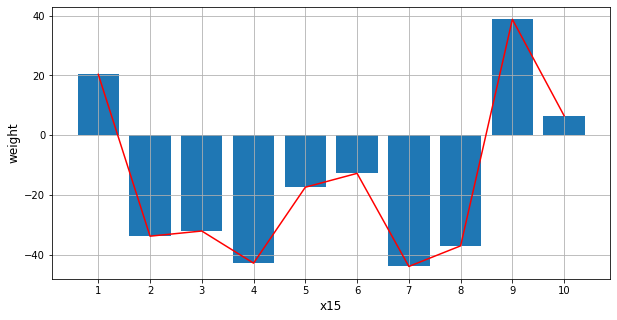

In [57]:
a = screening('x15')

Variable:  x15


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
a(1-8),1368.0,0.189029,1271.0,0.185683,97.0,0.247449,0.070906,-28.716361
b(9-10),5869.0,0.810971,5574.0,0.814317,295.0,0.752551,0.050264,7.888095
Total,7237.0,1.000000,6845.0,1.000000,392.0,1.000000,0.054166,0.000000


Information Value =  0.02260910798117169


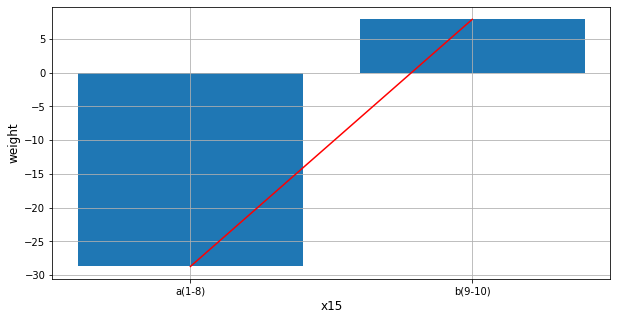

In [58]:
gpBins = [0,  8, 100]
gpLabels = ['a(1-8)', 'b(9-10)']
data['x15'] = pd.cut(data_orng['x15'], bins=gpBins, labels=gpLabels)
a = screening('x15')

IV达标，趋势合理，选入。

In [59]:
gpDict['x15'] = ['bin',gpBins, gpLabels]
run1Df['x15'] = data['x15']

### x16分析

Variable:  x16


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
1,861.0,0.118972,805.0,0.117604,56.0,0.142857,0.065041,-19.452131
2,1504.0,0.207821,1431.0,0.209058,73.0,0.186224,0.048537,11.565744
3,1580.0,0.218323,1500.0,0.219138,80.0,0.204082,0.050633,7.118185
4,3292.0,0.454885,3109.0,0.454200,183.0,0.466837,0.055589,-2.744164
Total,7237.0,1.000000,6845.0,1.000000,392.0,1.000000,0.054166,0.000000


Information Value =  0.008971601157083856


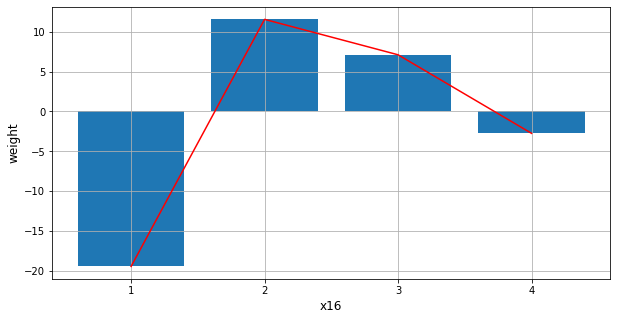

In [60]:
a = screening('x16')

IV不达标，趋势不合理，不选。

### x17分析

Variable:  x17


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
1,172.0,0.023767,167.0,0.024397,5.0,0.012755,0.029070,64.854400
2,82.0,0.011331,75.0,0.010957,7.0,0.017857,0.085366,-48.843393
3,117.0,0.016167,111.0,0.016216,6.0,0.015306,0.051282,5.775883
4,246.0,0.033992,236.0,0.034478,10.0,0.025510,0.040650,30.123481
5,755.0,0.104325,704.0,0.102849,51.0,0.130102,0.067550,-23.505917
6,1239.0,0.171204,1171.0,0.171074,68.0,0.173469,0.054883,-1.390624
7,893.0,0.123394,830.0,0.121256,63.0,0.160714,0.070549,-28.172092
8,1124.0,0.155313,1056.0,0.154273,68.0,0.173469,0.060498,-11.727614
9,1324.0,0.182949,1242.0,0.181446,82.0,0.209184,0.061934,-14.225288
10,1285.0,0.177560,1253.0,0.183053,32.0,0.081633,0.024903,80.754815


Information Value =  0.11932933347635674


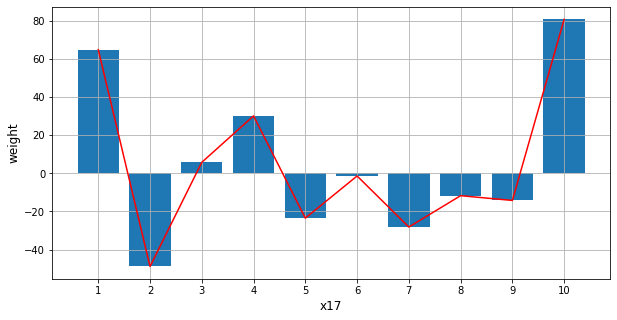

In [61]:
a = screening('x17')

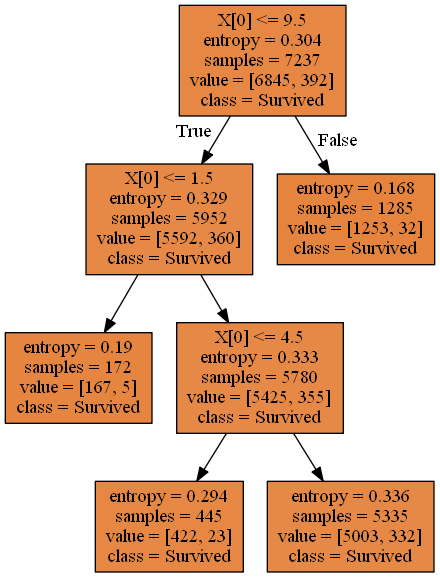

In [62]:
useTree('x17',3)

Variable:  x17


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
a(1),172.0,0.023767,167.0,0.024397,5.0,0.012755,0.029070,64.854400
b(2-4),445.0,0.061490,422.0,0.061651,23.0,0.058673,0.051685,4.949920
c(5-9),5335.0,0.737184,5003.0,0.730898,332.0,0.846939,0.062231,-14.735386
d(10),1285.0,0.177560,1253.0,0.183053,32.0,0.081633,0.024903,80.754815
Total,7237.0,1.000000,6845.0,1.000000,392.0,1.000000,0.054166,0.000000


Information Value =  0.10669896300454829


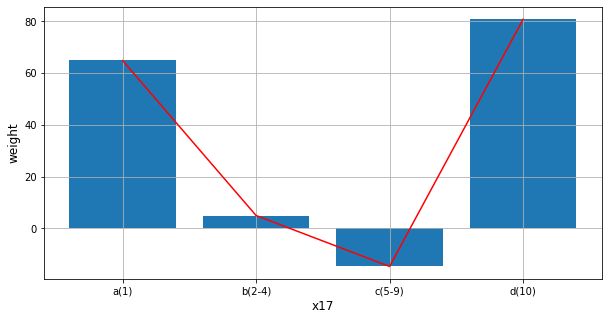

In [63]:
gpBins = [0, 1, 4, 9, 100]
gpLabels = ['a(1)', 'b(2-4)','c(5-9)','d(10)']
data['x17'] = pd.cut(data_orng['x17'], bins=gpBins, labels=gpLabels)
a = screening('x17')

Variable:  x17


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
a(10),1285.0,0.177560,1253.0,0.183053,32.0,0.081633,0.024903,80.754815
b(1-4),617.0,0.085256,589.0,0.086048,28.0,0.071429,0.045381,18.620978
c(5-6),1994.0,0.275529,1875.0,0.273923,119.0,0.303571,0.059679,-10.277145
d(7-9),3341.0,0.461655,3128.0,0.456976,213.0,0.543367,0.063753,-17.315496
Total,7237.0,1.000000,6845.0,1.000000,392.0,1.000000,0.054166,0.000000


Information Value =  0.10263055971592774


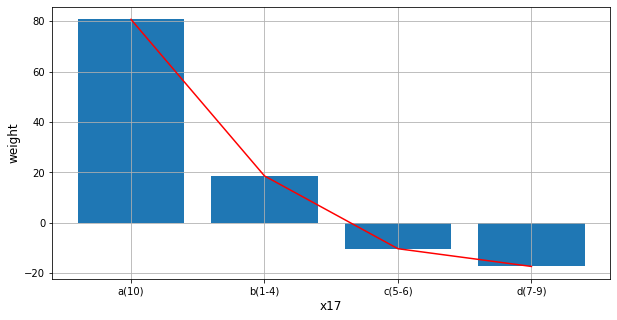

In [64]:
gpBins = [0,4,6, 9, 100]
gpLabels = ['b(1-4)','c(5-6)','d(7-9)','a(10)']
data['x17'] = pd.cut(data_orng['x17'], bins=gpBins, labels=gpLabels)
a = screening('x17')

选入。

In [65]:
gpDict['x17'] = ['bin',gpBins,gpLabels]
run1Df['x17'] = data['x17']

### x18分析

Variable:  x18


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
1,7147.0,0.987564,6767.0,0.988605,380.0000,0.969388,0.053169,1.962999
2,12.0,0.001658,12.0,0.001753,0.0001,0.000100,0.000008,286.397328
3,46.0,0.006356,40.0,0.005844,6.0000,0.015306,0.130435,-96.289191
4,19.0,0.002625,18.0,0.002630,1.0000,0.002551,0.052632,3.035986
5,13.0,0.001796,8.0,0.001169,5.0000,0.012755,0.384615,-239.000827
Total,7237.0,1.000000,6845.0,1.000000,392.0001,1.000100,0.054166,0.000000


Information Value =  0.04191688287480145


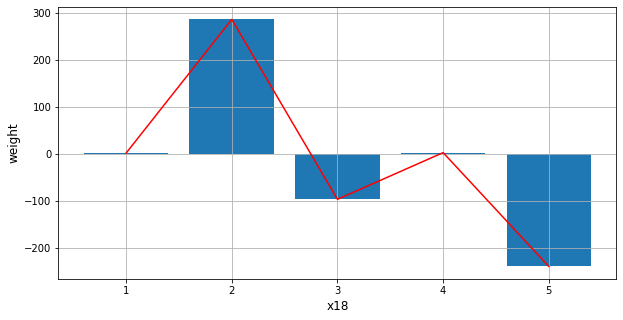

In [66]:
a = screening('x18')

Variable:  x18


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
a(1-2),7159.0,0.989222,6779.0,0.990358,380.0,0.969388,0.053080,2.140173
b(3-5),78.0,0.010778,66.0,0.009642,12.0,0.030612,0.153846,-115.526381
Total,7237.0,1.000000,6845.0,1.000000,392.0,1.000000,0.054166,0.000000


Information Value =  0.02467487670918018


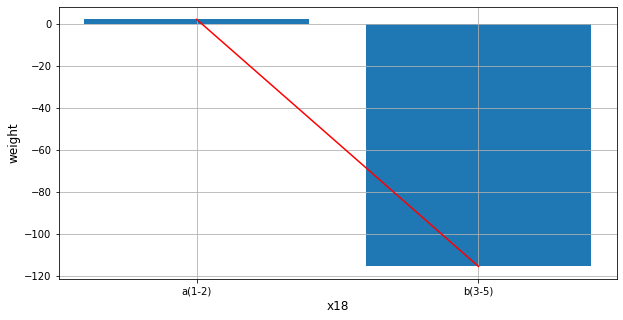

In [67]:
gpBins = [0, 2, 100]
gpLabels = ['a(1-2)', 'b(3-5)']
data['x18'] = pd.cut(data_orng['x18'], bins=gpBins, labels=gpLabels)
a = screening('x18')

IV达标，趋势合理，选入。

In [68]:
gpDict['x18'] = ['bin',gpBins,gpLabels]
run1Df['x18'] = data['x18']

### x19分析

Variable:  x19


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
1,5090.0,0.703330,4875.0,0.712199,215.0,0.548469,0.042240,26.122546
2,443.0,0.061213,409.0,0.059752,34.0,0.086735,0.076749,-37.265727
3,473.0,0.065359,433.0,0.063258,40.0,0.102041,0.084567,-47.815362
4,238.0,0.032887,225.0,0.032871,13.0,0.033163,0.054622,-0.886085
5,993.0,0.137212,903.0,0.131921,90.0,0.229592,0.090634,-55.409901
Total,7237.0,1.000000,6845.0,1.000000,392.0,1.000000,0.054166,0.000000


Information Value =  0.12549175071494637


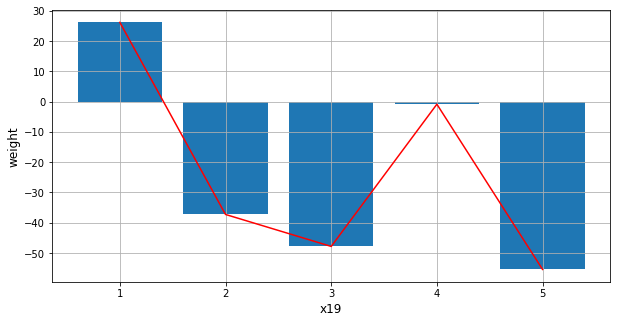

In [69]:
a = screening('x19')

Variable:  x19


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
a(1),5090.0,0.703330,4875.0,0.712199,215.0,0.548469,0.042240,26.122546
b(2),443.0,0.061213,409.0,0.059752,34.0,0.086735,0.076749,-37.265727
c(3),473.0,0.065359,433.0,0.063258,40.0,0.102041,0.084567,-47.815362
d(4-5),1231.0,0.170098,1128.0,0.164792,103.0,0.262755,0.083672,-46.653945
Total,7237.0,1.000000,6845.0,1.000000,392.0,1.000000,0.054166,0.000000


Information Value =  0.11707364177944718


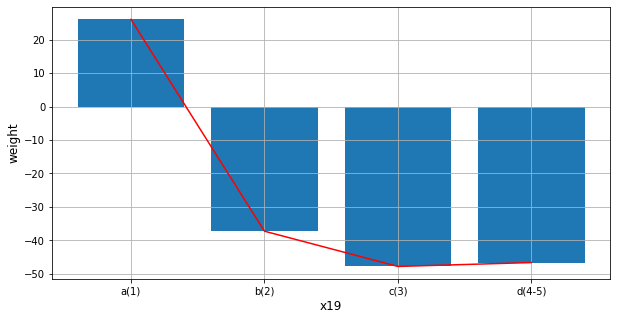

In [70]:
gpBins = [0,1,2,3,100]
gpLabels = ['a(1)','b(2)','c(3)','d(4-5)']
data['x19'] = pd.cut(data_orng['x19'], bins=gpBins, labels=gpLabels)
a = screening('x19')

Variable:  x19


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
a(1),5090.0,0.703330,4875.0,0.712199,215.0,0.548469,0.042240,26.122546
b(2),443.0,0.061213,409.0,0.059752,34.0,0.086735,0.076749,-37.265727
c(3-5),1704.0,0.235457,1561.0,0.228050,143.0,0.364796,0.083920,-46.977461
Total,7237.0,1.000000,6845.0,1.000000,392.0,1.000000,0.054166,0.000000


Information Value =  0.1170656049559769


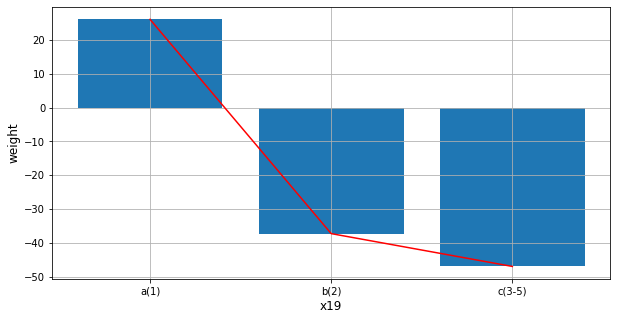

In [71]:
gpBins = [0,1,2,100]
gpLabels = ['a(1)','b(2)','c(3-5)']
data['x19'] = pd.cut(data_orng['x19'], bins=gpBins, labels=gpLabels)
a = screening('x19')

IV达标，趋势合理，选入。

In [72]:
gpDict['x19'] = ['bin',gpBins,gpLabels]
run1Df['x19'] = data['x19']

### x20分析

Variable:  x20


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
1,6902.0,0.953710,6555.0,0.957633,347.0,0.885204,0.050275,7.864672
2,232.0,0.032057,203.0,0.029657,29.0,0.073980,0.125000,-91.410175
3,55.0,0.007600,46.0,0.006720,9.0,0.022959,0.163636,-122.859508
4,35.0,0.004836,30.0,0.004383,5.0,0.012755,0.142857,-106.825243
5,13.0,0.001796,11.0,0.001607,2.0,0.005102,0.153846,-115.526381
Total,7237.0,1.000000,6845.0,1.000000,392.0,1.000000,0.054166,0.000000


Information Value =  0.07914451614917836


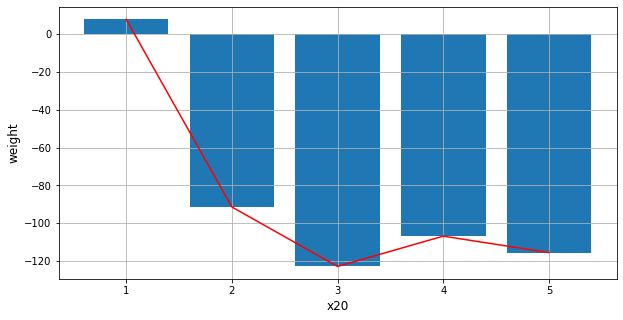

In [73]:
a = screening('x20')

Variable:  x20


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
a(1),6902.0,0.953710,6555.0,0.957633,347.0,0.885204,0.050275,7.864672
b(2),232.0,0.032057,203.0,0.029657,29.0,0.073980,0.125000,-91.410175
c(3),55.0,0.007600,46.0,0.006720,9.0,0.022959,0.163636,-122.859508
d(4-5),48.0,0.006633,41.0,0.005990,7.0,0.017857,0.145833,-109.234998
Total,7237.0,1.000000,6845.0,1.000000,392.0,1.000000,0.054166,0.000000


Information Value =  0.07912638345941644


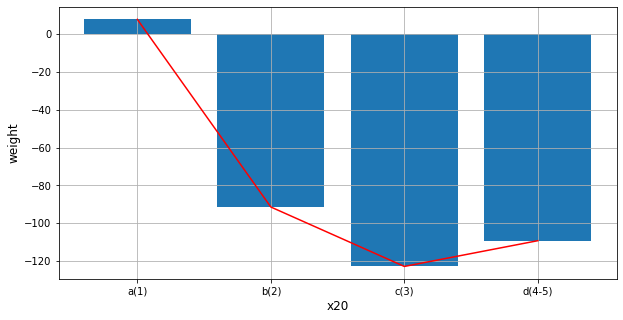

In [74]:
gpBins = [0,1,2,3,100]
gpLabels = ['a(1)','b(2)','c(3)','d(4-5)']
data['x20'] = pd.cut(data_orng['x20'], bins=gpBins, labels=gpLabels)
a = screening('x20')

Variable:  x20


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
a(1),6902.0,0.953710,6555.0,0.957633,347.0,0.885204,0.050275,7.864672
b(2),232.0,0.032057,203.0,0.029657,29.0,0.073980,0.125000,-91.410175
c(3-5),103.0,0.014232,87.0,0.012710,16.0,0.040816,0.155340,-116.669250
Total,7237.0,1.000000,6845.0,1.000000,392.0,1.000000,0.054166,0.000000


Information Value =  0.07900340076112126


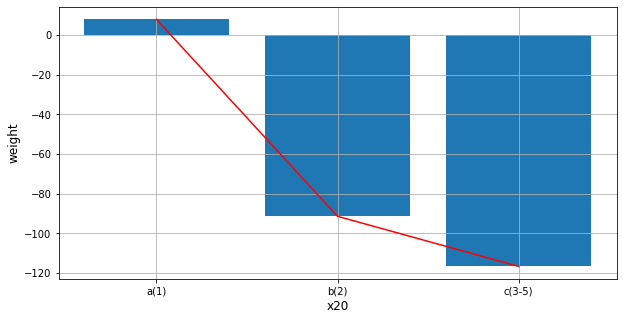

In [457]:
gpBins = [0,1,2,100]
gpLabels = ['a(1)','b(2)','c(3-5)']
data['x20'] = pd.cut(data_orng['x20'], bins=gpBins, labels=gpLabels)
a = screening('x20')

IV达标，趋势合理，选入。

In [76]:
gpDict['x20'] = ['bin',gpBins,gpLabels]
run1Df['x20'] = data['x20']

### x21分析

In [77]:
a = screening('x21')

There is missing!


Variable:  x21


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
0.0,6859.0,0.947768,6486.0,0.947553,373.0000,0.951531,0.054381,-0.418903
1001.0,339.0,0.046843,322.0,0.047042,17.0000,0.043367,0.050147,8.132630
1002.0,15.0,0.002073,15.0,0.002191,0.0001,0.000100,0.000007,308.711684
1003.0,7.0,0.000967,6.0,0.000877,1.0000,0.002551,0.142857,-106.825243
1004.0,8.0,0.001105,7.0,0.001023,1.0000,0.002551,0.125000,-91.410175
9999.0,9.0,0.001244,9.0,0.001315,0.0001,0.000100,0.000011,257.629121
Total,7237.0,1.000000,6845.0,1.000000,392.0002,1.000200,0.054166,0.000000


Information Value =  0.013087412632271624


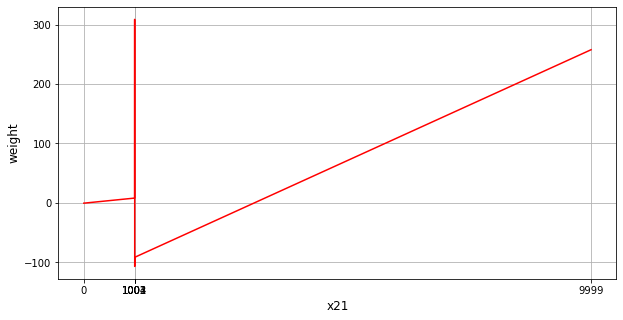

In [78]:
data['x21'] = data_orng['x21'].fillna(0)
a = screening('x21')

Variable:  x21


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
a(missing),6859.0,0.947768,6486.0,0.947553,373.0,0.951531,0.054381,-0.418903
b(not_missing),378.0,0.052232,359.0,0.052447,19.0,0.048469,0.050265,7.887151
Total,7237.0,1.000000,6845.0,1.000000,392.0,1.000000,0.054166,0.000000


Information Value =  0.0003303860876463243


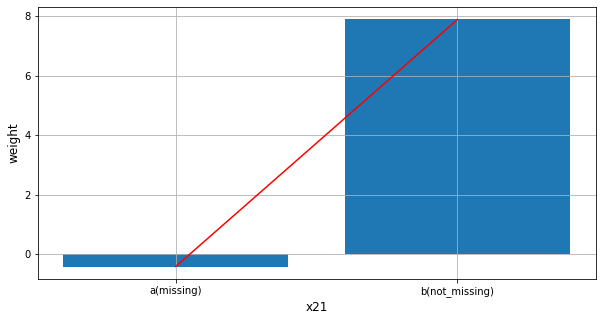

In [79]:
data['x21'] = data_orng['x21'].apply(lambda x: 'a(missing)' if np.isnan(x) else 'b(not_missing)' )
a = screening('x21')

IV不达标，不选。

### x22分析

In [80]:
a = screening('x22')

There is missing!


Variable:  x22


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
"(0,1000]",109.0,0.015061,105.0,0.015340,4.0,0.010204,0.036697,40.765409
"(1000,10000]",137.0,0.018930,130.0,0.018992,7.0,0.017857,0.051095,6.161240
"(10000,50000]",91.0,0.012574,87.0,0.012710,4.0,0.010204,0.043956,21.960186
"(200000,∞)",11.0,0.001520,9.0,0.001315,2.0,0.005102,0.181818,-135.593450
"(50000,200000]",25.0,0.003454,23.0,0.003360,2.0,0.005102,0.080000,-41.766486
missing,6864.0,0.948459,6491.0,0.948283,373.0,0.951531,0.054341,-0.341844
Total,7237.0,1.000000,6845.0,1.000000,392.0,1.000000,0.054166,0.000000


Information Value =  0.008587619018023534


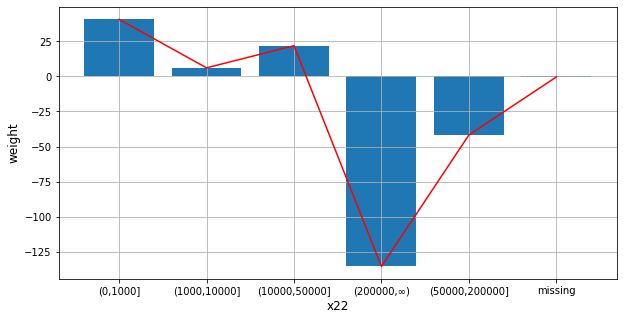

In [81]:
data['x22'] = data_orng['x22'].fillna('missing')
a = screening('x22')

Variable:  x22


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
"a(0,50000]",337.0,0.046566,322.0,0.047042,15.0,0.038265,0.044510,20.648945
"b(50000,200000]",25.0,0.003454,23.0,0.003360,2.0,0.005102,0.080000,-41.766486
"c(200000,∞)",11.0,0.001520,9.0,0.001315,2.0,0.005102,0.181818,-135.593450
missing,6864.0,0.948459,6491.0,0.948283,373.0,0.951531,0.054341,-0.341844
Total,7237.0,1.000000,6845.0,1.000000,392.0,1.000000,0.054166,0.000000


Information Value =  0.00768607235350737


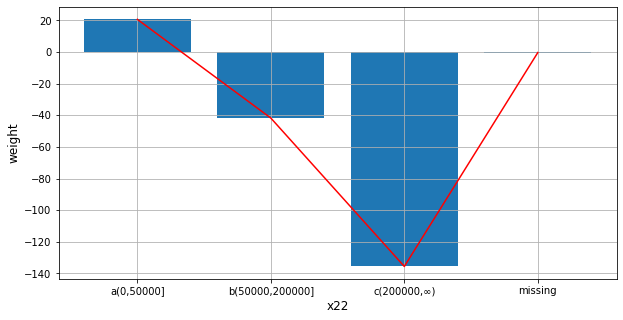

In [82]:
x22_map = {a[0].index[0]:'a(0,50000]',
           a[0].index[1]:'a(0,50000]',
           a[0].index[2]:'a(0,50000]',
          a[0].index[4]:'b(50000,200000]',
          a[0].index[3]:'c(200000,∞)',
          'missing':'missing'}
data['x22'] = data['x22'].map(x22_map)
a = screening('x22')

IV不达标，不选。

### x23分析

In [83]:
a = screening('x23')

There is missing!


Variable:  x23


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
"(0,1000]",67.0,0.009258,64.0,0.009350,3.0,0.007653,0.044776,20.025890
"(1000,10000]",130.0,0.017963,125.0,0.018262,5.0,0.012755,0.038462,35.886393
"(10000,50000)",109.0,0.015061,104.0,0.015194,5.0,0.012755,0.045872,17.494109
"[200000,∞)",20.0,0.002764,18.0,0.002630,2.0,0.005102,0.100000,-66.278732
"[50000,200000)",47.0,0.006494,43.0,0.006282,4.0,0.010204,0.085106,-48.510614
missing,6864.0,0.948459,6491.0,0.948283,373.0,0.951531,0.054341,-0.341844
Total,7237.0,1.000000,6845.0,1.000000,392.0,1.000000,0.054166,0.000000


Information Value =  0.006294854651993178


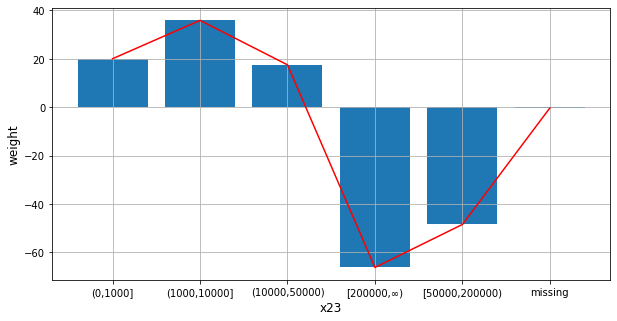

In [84]:
data['x23'] = data_orng['x23'].fillna('missing')
a = screening('x23')

Variable:  x23


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
"a(0,50000]",306.0,0.042283,293.0,0.042805,13.0,0.033163,0.042484,25.521135
"b(50000,200000]",47.0,0.006494,43.0,0.006282,4.0,0.010204,0.085106,-48.510614
"c(200000,∞)",20.0,0.002764,18.0,0.002630,2.0,0.005102,0.100000,-66.278732
missing,6864.0,0.948459,6491.0,0.948283,373.0,0.951531,0.054341,-0.341844
Total,7237.0,1.000000,6845.0,1.000000,392.0,1.000000,0.054166,0.000000


Information Value =  0.006013083400934421


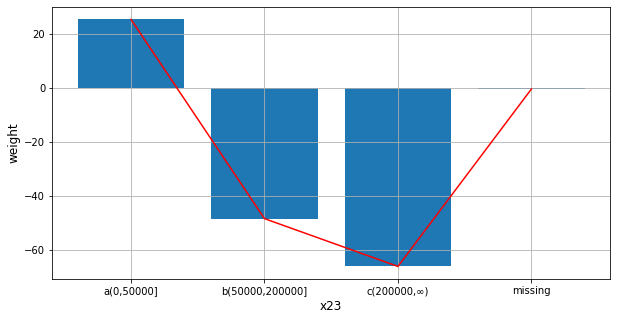

In [85]:
x23_map = {a[0].index[0]:'a(0,50000]',
           a[0].index[1]:'a(0,50000]',
           a[0].index[2]:'a(0,50000]',
          a[0].index[4]:'b(50000,200000]',
          a[0].index[3]:'c(200000,∞)',
          'missing':'missing'}
data['x23'] = data['x23'].map(x23_map)
a = screening('x23')

IV不达标，不选。

## x24分析

Variable:  x24


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
0,40.0,0.005527,38.0,0.005551,2.0000,0.005102,0.050000,8.442708
1,72.0,0.009949,70.0,0.010226,2.0000,0.005102,0.027778,69.533616
2,93.0,0.012851,78.0,0.011395,15.0000,0.038265,0.161290,-121.135327
3,91.0,0.012574,81.0,0.011833,10.0000,0.025510,0.109890,-76.814784
4,72.0,0.009949,63.0,0.009204,9.0000,0.022959,0.125000,-91.410175
...,...,...,...,...,...,...,...,...
180,2.0,0.000276,2.0,0.000292,0.0001,0.000100,0.000050,107.221381
181,1.0,0.000138,1.0,0.000146,0.0001,0.000100,0.000100,37.906663
182,1.0,0.000138,1.0,0.000146,0.0001,0.000100,0.000100,37.906663
183,3.0,0.000415,3.0,0.000438,0.0001,0.000100,0.000033,147.767892


Information Value =  1.2558602897076236


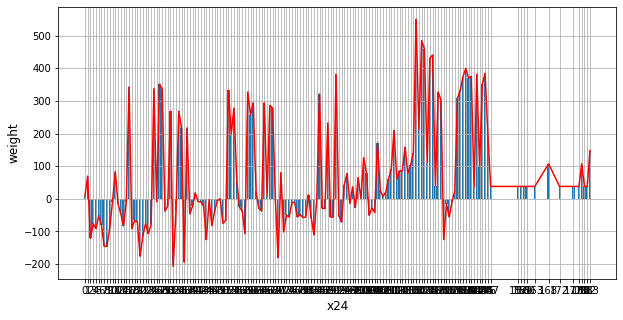

In [86]:
a = screening('x24')

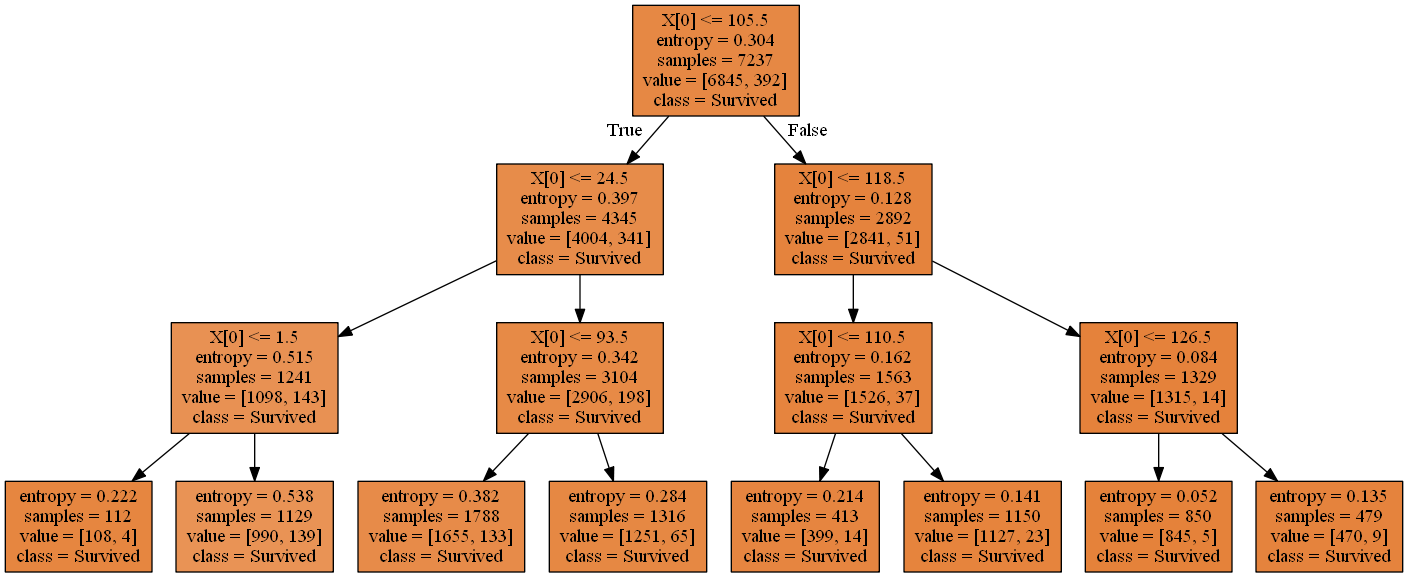

In [87]:
useTree('x24',3)

Variable:  x24


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
a(<=1.5),112.0,0.015476,108.0,0.015778,4.0,0.010204,0.035714,43.582497
b(<=24.5),1129.0,0.156004,990.0,0.144631,139.0,0.354592,0.123118,-89.678089
c(<=93.5),1788.0,0.247064,1655.0,0.241782,133.0,0.339286,0.074385,-33.880474
d(<=105.5),1316.0,0.181843,1251.0,0.182761,65.0,0.165816,0.049392,9.729934
e(<=110.5),413.0,0.057068,399.0,0.058291,14.0,0.035714,0.033898,48.989219
f(<=118.5),1150.0,0.158906,1127.0,0.164646,23.0,0.058673,0.020000,103.180840
g(<=126.5),850.0,0.117452,845.0,0.123448,5.0,0.012755,0.005882,226.988682
h(>126.5),479.0,0.066188,470.0,0.068663,9.0,0.022959,0.018789,109.549622
Total,7237.0,1.000000,6845.0,1.000000,392.0,1.000000,0.054166,0.000000


Information Value =  0.6471328757362408


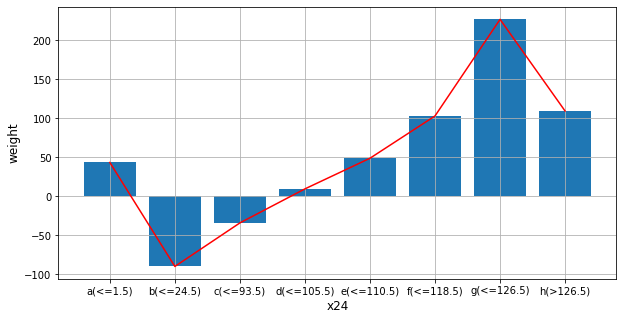

In [88]:
gpBins = [-1000,1.5,24.5,93.5,105.5,110.5,118.5,126.5,1000]
gpLabels = ['a(<=1.5)','b(<=24.5)','c(<=93.5)','d(<=105.5)','e(<=110.5)','f(<=118.5)','g(<=126.5)','h(>126.5)']
data['x24'] = pd.cut(data_orng['x24'],bins = gpBins,labels = gpLabels)
a = screening('x24')

Variable:  x24


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
a(<=24.5),1241.0,0.171480,1098.0,0.160409,143.0,0.364796,0.115230,-82.161091
b(<=93.5),1788.0,0.247064,1655.0,0.241782,133.0,0.339286,0.074385,-33.880474
c(<=105.5),1316.0,0.181843,1251.0,0.182761,65.0,0.165816,0.049392,9.729934
d(<=110.5),413.0,0.057068,399.0,0.058291,14.0,0.035714,0.033898,48.989219
e(<=118.5),1150.0,0.158906,1127.0,0.164646,23.0,0.058673,0.020000,103.180840
f(>118.5),1329.0,0.183640,1315.0,0.192111,14.0,0.035714,0.010534,168.252272
Total,7237.0,1.000000,6845.0,1.000000,392.0,1.000000,0.054166,0.000000


Information Value =  0.586153964777645


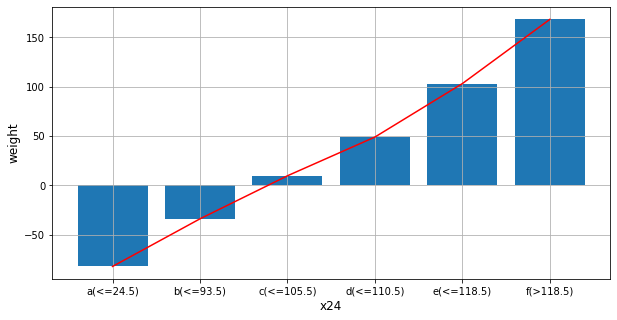

In [89]:
gpBins = [-1000,24.5,93.5,105.5,110.5,118.5,1000]
gpLabels = ['a(<=24.5)','b(<=93.5)','c(<=105.5)','d(<=110.5)','e(<=118.5)','f(>118.5)']
data['x24'] = pd.cut(data_orng['x24'],bins = gpBins,labels = gpLabels)
a = screening('x24')

IV达标，趋势合理，选入。

In [90]:
gpDict['x24'] = ['bin',gpBins,gpLabels]
run1Df['x24'] = data['x24']

### x25分析

Variable:  x25


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
22,142.0,0.019621,135.0,0.019722,7.0000,0.017857,0.049296,9.935273
23,320.0,0.044217,312.0,0.045581,8.0000,0.020408,0.025000,80.354975
24,428.0,0.059141,408.0,0.059606,20.0000,0.051020,0.046729,15.552300
25,458.0,0.063286,431.0,0.062966,27.0000,0.068878,0.058952,-8.974067
26,462.0,0.063839,442.0,0.064573,20.0000,0.051020,0.043290,23.556571
27,434.0,0.059970,410.0,0.059898,24.0000,0.061224,0.055300,-2.190857
28,409.0,0.056515,387.0,0.056538,22.0000,0.056122,0.053790,0.737034
29,475.0,0.065635,459.0,0.067056,16.0000,0.040816,0.033684,49.644959
30,507.0,0.070057,481.0,0.070270,26.0000,0.066327,0.051282,5.775883
31,397.0,0.054857,375.0,0.054785,22.0000,0.056122,0.055416,-2.412833


Information Value =  0.10748827957618344


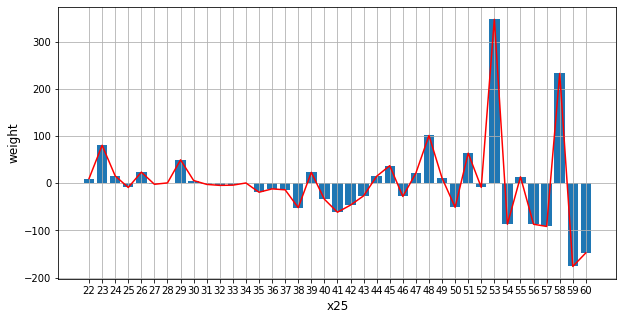

In [91]:
a = screening('x25')

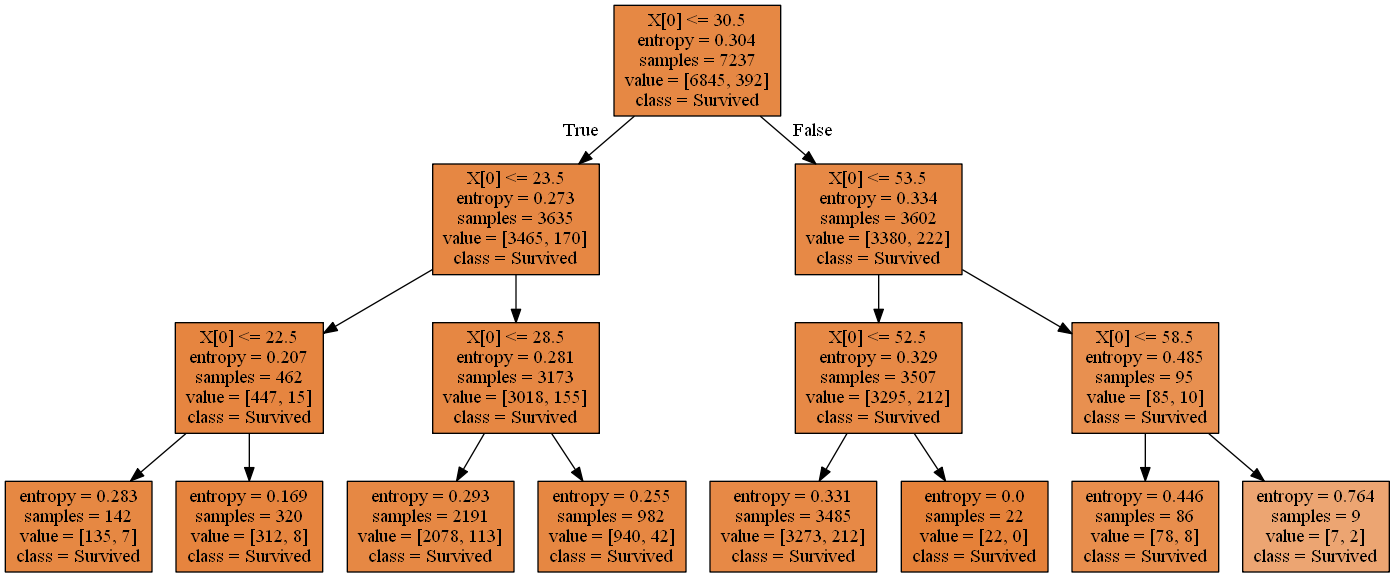

In [92]:
useTree('x25',3)

Variable:  x25


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
a(<=22.5),142.0,0.019621,135.0,0.019722,7.0,0.017857,0.049296,9.935273
b(<=23.5),320.0,0.044217,312.0,0.045581,8.0,0.020408,0.025000,80.354975
c(<=28.5),2191.0,0.302750,2078.0,0.303579,113.0,0.288265,0.051575,5.176146
d(<=30.5),982.0,0.135692,940.0,0.137327,42.0,0.107143,0.042770,24.819836
e(<=52.5),3485.0,0.481553,3273.0,0.478159,212.0,0.540816,0.060832,-12.313590
f(<=53.5),22.0,0.003040,22.0,0.003214,0.0,0.000000,0.000000,inf
g(<=58.5),86.0,0.011883,78.0,0.011395,8.0,0.020408,0.093023,-58.274461
h(>58.5),9.0,0.001244,7.0,0.001023,2.0,0.005102,0.222222,-160.724893
Total,7237.0,1.000000,6845.0,1.000000,392.0,1.000000,0.054166,0.000000


Information Value =  inf


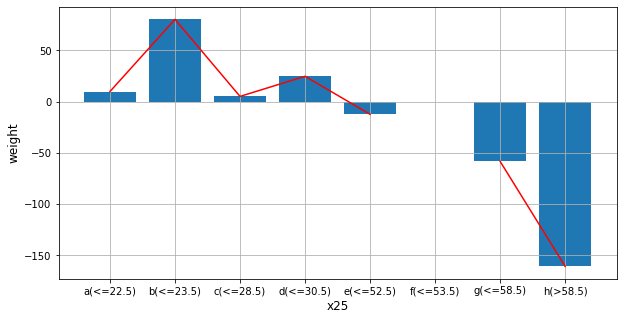

In [93]:
gpBins = [-1000,22.5,23.5,28.5,30.5,52.5,53.5,58.5,1000]
gpLabels = ['a(<=22.5)','b(<=23.5)','c(<=28.5)','d(<=30.5)','e(<=52.5)','f(<=53.5)','g(<=58.5)','h(>58.5)']
data['x25'] = pd.cut(data_orng['x25'],bins = gpBins,labels = gpLabels)
a = screening('x25')

Variable:  x25


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
a(<=23),462.0,0.063839,447.0,0.065303,15.0,0.038265,0.032468,53.449650
b(<=30),3173.0,0.438441,3018.0,0.440906,155.0,0.395408,0.048850,10.891262
c(<=53),3507.0,0.484593,3295.0,0.481373,212.0,0.540816,0.060451,-11.643673
d(>53),95.0,0.013127,85.0,0.012418,10.0,0.025510,0.105263,-71.994573
Total,7237.0,1.000000,6845.0,1.000000,392.0,1.000000,0.054166,0.000000


Information Value =  0.03575405098358199


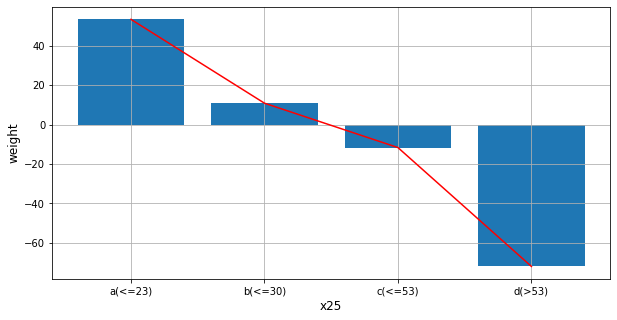

In [94]:
gpBins = [-1000,23.5,30.5,53.5,1000]
gpLabels = ['a(<=23)','b(<=30)','c(<=53)','d(>53)']
data['x25'] = pd.cut(data_orng['x25'],bins = gpBins,labels = gpLabels)
a = screening('x25')

Variable:  x25


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
a(<=23),462.0,0.063839,447.0,0.065303,15.0,0.038265,0.032468,53.449650
b(<=30),3173.0,0.438441,3018.0,0.440906,155.0,0.395408,0.048850,10.891262
c(<=43),2995.0,0.413846,2807.0,0.410080,188.0,0.479592,0.062771,-15.658228
d(<=53),512.0,0.070748,488.0,0.071293,24.0,0.061224,0.046875,15.224968
e(>53),95.0,0.013127,85.0,0.012418,10.0,0.025510,0.105263,-71.994573
Total,7237.0,1.000000,6845.0,1.000000,392.0,1.000000,0.054166,0.000000


Information Value =  0.04124987726171191


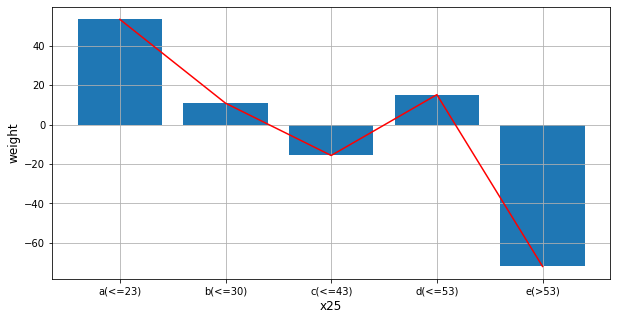

In [454]:
gpBins = [-1000,23,30,43,53,1000]
gpLabels = ['a(<=23)','b(<=30)','c(<=43)','d(<=53)','e(>53)']
data['x25'] = pd.cut(data_orng['x25'],bins = gpBins,labels = gpLabels)
a = screening('x25')

IV达标，趋势合理，选入。

In [95]:
gpDict['x25'] = ['bin', gpBins, gpLabels]
run1Df['x25'] = data['x25']

### x26分析

Variable:  x26


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
11,2.0,0.000276,2.0,0.000292,0.0001,0.000100,0.000050,107.221381
12,4.0,0.000553,3.0,0.000438,1.0000,0.002551,0.250000,-176.139961
13,27.0,0.003731,24.0,0.003506,3.0000,0.007653,0.111111,-78.057036
14,33.0,0.004560,31.0,0.004529,2.0000,0.005102,0.060606,-11.917187
15,10.0,0.001382,8.0,0.001169,2.0000,0.005102,0.200000,-147.371754
21,11.0,0.001520,11.0,0.001607,0.0001,0.000100,0.000009,277.696191
22,22.0,0.003040,20.0,0.002922,2.0000,0.005102,0.090909,-55.742680
23,55.0,0.007600,48.0,0.007012,7.0000,0.017857,0.127273,-93.472104
31,7.0,0.000967,6.0,0.000877,1.0000,0.002551,0.142857,-106.825243
32,154.0,0.021280,151.0,0.022060,3.0000,0.007653,0.019481,105.865565


Information Value =  0.14121668082689312


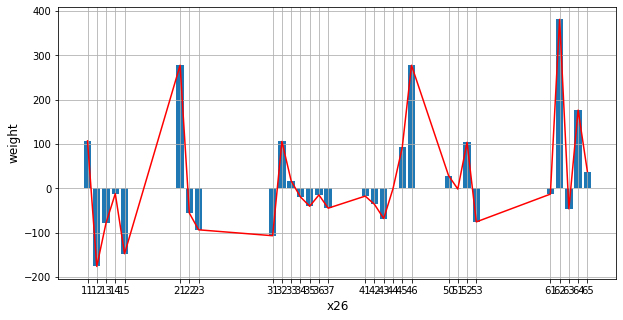

In [96]:
a = screening('x26')

这个变量应该不是纯数值，不知道怎么弄

### x27分析

Variable:  x27


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
0,5482.0,0.757496,5161.0,0.753981,321.0,0.818878,0.058555,-8.256738
1,1755.0,0.242504,1684.0,0.246019,71.0,0.181122,0.040456,30.623542
Total,7237.0,1.000000,6845.0,1.000000,392.0,1.000000,0.054166,0.000000


Information Value =  0.025231957800985153


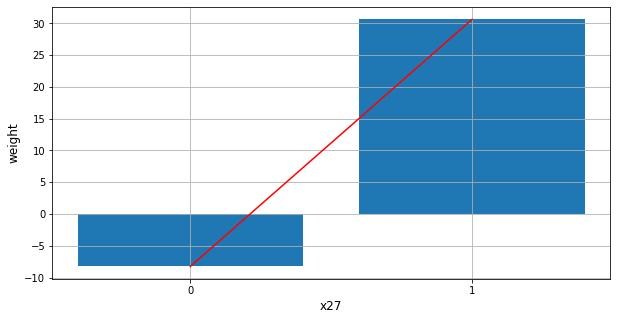

In [97]:
a = screening('x27')

IV达标，趋势合理，选入。

In [98]:
run1Df['x27'] = data['x27']

### x28分析

Variable:  x28


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
0,3198.0,0.441896,2993.0,0.437253,205.0,0.522959,0.064103,-17.899037
1,4039.0,0.558104,3852.0,0.562747,187.0,0.477041,0.046299,16.522726
Total,7237.0,1.000000,6845.0,1.000000,392.0,1.000000,0.054166,0.000000


Information Value =  0.02950141751906432


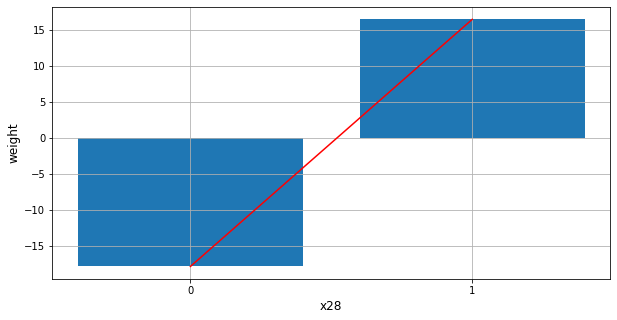

In [99]:
a = screening('x28')

IV达标，趋势合理，选入。

In [100]:
run1Df['x28'] = data['x28']

### x29分析

Variable:  x29


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
0,4013.0,0.554512,3808.0,0.556318,205.0,0.522959,0.051084,6.183752
1,3224.0,0.445488,3037.0,0.443682,187.0,0.477041,0.058002,-7.249505
Total,7237.0,1.000000,6845.0,1.000000,392.0,1.000000,0.054166,0.000000


Information Value =  0.004481240047970094


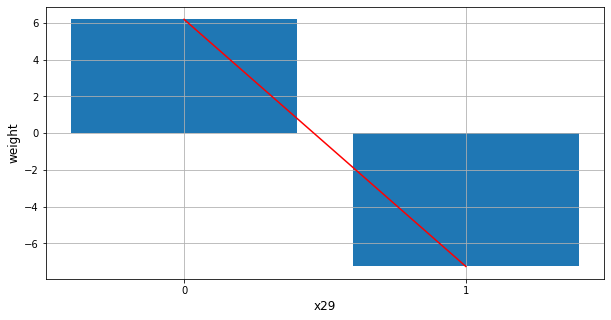

In [101]:
a = screening('x29')

IV不达标，不选。

### x30分析

Variable:  x30


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
0,6109.0,0.844134,5801.0,0.84748,308.0,0.785714,0.050417,7.567391
1,1128.0,0.155866,1044.0,0.15252,84.0,0.214286,0.074468,-34.001393
Total,7237.0,1.000000,6845.0,1.00000,392.0,1.000000,0.054166,0.000000


Information Value =  0.025675220098977002


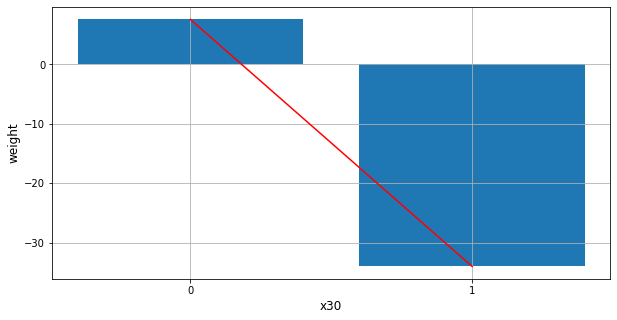

In [102]:
a = screening('x30')

IV达标，趋势合理，选入。

In [103]:
run1Df['x30'] = data['x30']

### 初筛结果

In [104]:
run1Df

,x3,x5,x8,x10,x12,x15,x17,x18,x19,x20,x24,x25,x27,x28,x30
0,b(4-8),b(4-6),d(9-10),D,b,b(9-10),c(5-6),a(1-2),c(3-5),a(1),b(<=93.5),a(<=23),0,1,0
1,b(4-8),a(1-3),b(5-6),D,d,b(9-10),d(7-9),a(1-2),a(1),a(1),f(>118.5),b(<=30),1,1,0
2,c(9-10),c(7-10),d(9-10),A,c,b(9-10),d(7-9),a(1-2),b(2),a(1),f(>118.5),b(<=30),0,1,0
3,b(4-8),a(1-3),b(5-6),D,e,b(9-10),c(5-6),a(1-2),a(1),a(1),f(>118.5),b(<=30),0,1,0
4,b(4-8),b(4-6),b(5-6),D,e,a(1-8),c(5-6),a(1-2),a(1),a(1),b(<=93.5),b(<=30),0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7232,b(4-8),b(4-6),c(7-8),C,a,b(9-10),c(5-6),a(1-2),a(1),a(1),a(<=24.5),c(<=53),1,1,0
7233,c(9-10),b(4-6),d(9-10),B,a,b(9-10),d(7-9),a(1-2),c(3-5),a(1),a(<=24.5),c(<=53),0,1,1
7234,c(9-10),c(7-10),b(5-6),A,b,b(9-10),c(5-6),a(1-2),a(1),a(1),a(<=24.5),b(<=30),0,1,0
7235,a(1-3),c(7-10),c(7-8),D,e,b(9-10),c(5-6),a(1-2),a(1),a(1),a(<=24.5),c(<=53),1,0,0


## 2. Logistic regression and selection

In [363]:
if 'x24' in run1Df.columns: #x24不能用，所以要删除
    run1Df = run1Df.drop('x24',axis = 1)

'''
#此为在计算WOE之前分测试集

allData = data[run1Df.columns]

#划分训练集和测试集，测试集20%
data_train, data_test, Y_train, Y_test = train_test_split(allData.values, data_orng['label'].values, 
                                                          test_size=0.2)

data_train_df = pd.DataFrame(data_train, columns = allData.columns)
data_test_df = pd.DataFrame(data_test, columns = allData.columns)
X_train_df = pd.DataFrame()
X_test_df = pd.DataFrame()
woeMap = {}
IVDf = pd.DataFrame(index = ['IV'])
for name in run1Df.columns:
    a = screening(name,False,data_train_df)
    woeMap[name] = dict(zip(list(a[0].index)[:-1],list(a[0]['WOE'].values)[:-1]))
    X_train_df[name] = data_train_df[name].copy().map(woeMap[name])
    X_test_df[name] = data_test_df[name].copy().map(woeMap[name])
    IVDf[name] = a[1]
'''

In [364]:
#先算WOE再分测试集

woeDf = pd.DataFrame()
woeMap = {}
IVDf = pd.DataFrame(index = ['IV'])
for name in run1Df.columns:
    a = screening(name,False,run1Df)
    woeMap[name] = dict(zip(list(a[0].index)[:-1],list(a[0]['WOE'].values)[:-1]))
    woeDf[name] = run1Df[name].copy().map(woeMap[name])
    IVDf[name] = a[1]

In [365]:
IVDf.T.sort_values('IV') 

,IV
x3,0.021141
x15,0.022609
x5,0.023404
x18,0.024675
x27,0.025232
x30,0.025675
x28,0.029501
x25,0.035754
x8,0.051466
x10,0.077012


In [366]:
woeDf #用WOE值作为变量值

,x3,x5,x8,x10,x12,x15,x17,x18,x19,x20,x25,x27,x28,x30
0,-6.035385,0.535856,-22.710843,-12.685224,57.153777,7.888095,-10.277145,2.140173,-46.977461,7.864672,53.449650,-8.256738,16.522726,7.567391
1,-6.035385,12.051662,25.422000,-12.685224,-32.631508,7.888095,-17.315496,2.140173,26.122546,7.864672,10.891262,30.623542,16.522726,7.567391
2,22.017072,-29.331582,-22.710843,103.588173,-21.492880,7.888095,-17.315496,2.140173,-37.265727,7.864672,10.891262,-8.256738,16.522726,7.567391
3,-6.035385,12.051662,25.422000,-12.685224,-43.399526,7.888095,-10.277145,2.140173,26.122546,7.864672,10.891262,-8.256738,16.522726,7.567391
4,-6.035385,0.535856,25.422000,-12.685224,-43.399526,-28.716361,-10.277145,2.140173,26.122546,7.864672,10.891262,-8.256738,-17.899037,7.567391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7232,-6.035385,0.535856,1.216741,9.949517,158.655326,7.888095,-10.277145,2.140173,26.122546,7.864672,-11.643673,30.623542,16.522726,7.567391
7233,22.017072,0.535856,-22.710843,68.534856,158.655326,7.888095,-17.315496,2.140173,-46.977461,7.864672,-11.643673,-8.256738,16.522726,-34.001393
7234,22.017072,-29.331582,25.422000,103.588173,57.153777,7.888095,-10.277145,2.140173,26.122546,7.864672,10.891262,-8.256738,16.522726,7.567391
7235,-16.209034,-29.331582,1.216741,-12.685224,-43.399526,7.888095,-10.277145,2.140173,26.122546,7.864672,-11.643673,30.623542,-17.899037,7.567391


In [441]:
#划分训练集和测试集
X_train, X_test, Y_train, Y_test = train_test_split(woeDf.values, data_orng['label'].values,
                                                    test_size=0.2,random_state = 50)

In [442]:
X_train_df = pd.DataFrame(X_train, columns = woeDf.columns)
display(X_train_df)

,x3,x5,x8,x10,x12,x15,x17,x18,x19,x20,x25,x27,x28,x30
0,-6.03539,12.0517,-22.7108,-12.6852,-21.4929,7.8881,-10.2771,2.14017,-46.9775,7.86467,10.8913,-8.25674,16.5227,-34.0014
1,-16.209,-29.3316,60.5724,-12.6852,-43.3995,-28.7164,-10.2771,2.14017,-37.2657,7.86467,10.8913,-8.25674,-17.899,7.56739
2,-6.03539,12.0517,25.422,-12.6852,-32.6315,7.8881,-17.3155,2.14017,26.1225,7.86467,-11.6437,-8.25674,-17.899,7.56739
3,-6.03539,12.0517,-22.7108,-12.6852,-21.4929,7.8881,-10.2771,2.14017,26.1225,7.86467,53.4496,-8.25674,-17.899,7.56739
4,-6.03539,12.0517,1.21674,9.94952,57.1538,7.8881,-10.2771,2.14017,26.1225,7.86467,10.8913,-8.25674,-17.899,7.56739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5784,-6.03539,0.535856,1.21674,103.588,158.655,7.8881,80.7548,2.14017,26.1225,7.86467,-11.6437,30.6235,16.5227,7.56739
5785,-6.03539,12.0517,-22.7108,-12.6852,-43.3995,7.8881,-17.3155,2.14017,26.1225,7.86467,10.8913,-8.25674,-17.899,7.56739
5786,-6.03539,12.0517,-22.7108,-12.6852,57.1538,7.8881,-17.3155,2.14017,26.1225,7.86467,10.8913,-8.25674,16.5227,7.56739
5787,-6.03539,12.0517,25.422,-12.6852,-32.6315,7.8881,-10.2771,2.14017,26.1225,7.86467,-11.6437,-8.25674,-17.899,7.56739


In [443]:
X_test_df = pd.DataFrame(X_test, columns = woeDf.columns)
display(X_test_df)

,x3,x5,x8,x10,x12,x15,x17,x18,x19,x20,x25,x27,x28,x30
0,-6.03539,12.0517,-22.7108,9.94952,-21.4929,7.8881,-17.3155,-115.526,-46.9775,7.86467,-11.6437,30.6235,16.5227,7.56739
1,-16.209,0.535856,1.21674,-12.6852,-43.3995,7.8881,-10.2771,2.14017,26.1225,7.86467,-11.6437,-8.25674,-17.899,7.56739
2,-6.03539,0.535856,25.422,-12.6852,-21.4929,7.8881,-10.2771,2.14017,26.1225,7.86467,-11.6437,30.6235,16.5227,7.56739
3,-6.03539,12.0517,60.5724,-12.6852,-32.6315,7.8881,-10.2771,2.14017,26.1225,7.86467,-11.6437,-8.25674,-17.899,7.56739
4,22.0171,12.0517,1.21674,-12.6852,57.1538,7.8881,-10.2771,2.14017,26.1225,7.86467,-11.6437,-8.25674,-17.899,7.56739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1443,-6.03539,12.0517,1.21674,-12.6852,-21.4929,7.8881,-17.3155,2.14017,-46.9775,7.86467,-11.6437,-8.25674,16.5227,7.56739
1444,-6.03539,12.0517,-22.7108,-12.6852,-21.4929,7.8881,-17.3155,2.14017,26.1225,7.86467,10.8913,-8.25674,-17.899,7.56739
1445,-6.03539,0.535856,1.21674,-12.6852,-43.3995,-28.7164,18.621,2.14017,26.1225,7.86467,-11.6437,-8.25674,16.5227,7.56739
1446,22.0171,0.535856,1.21674,-12.6852,-21.4929,-28.7164,-10.2771,2.14017,-46.9775,7.86467,10.8913,30.6235,-17.899,7.56739


In [444]:
X_all_df = woeDf
Y_all = data_orng['label'].values

In [445]:
methodDict = {} #存放回归方法和结果

'''
Forward selection
enterAlpha = 0.01 #进入门槛为0.1
cnt = 1
enteredList = []
candidateList = IVDf.T.sort_values('IV').index.to_list() 
y = Y_train

while cnt > 0:
    
    cnt = 0
    pDf = pd.DataFrame(index = ['pvalue'])

    for name in candidateList:
        regList = enteredList + [name]
        x = sm.add_constant(X_train_df[regList].values).astype(float)
        logit = sm.Logit(y,x).fit(disp = 0)
        pvalue = logit.pvalues[-1]
        if pvalue < enterAlpha:
            cnt += 1
            pDf[name] = pvalue
    if cnt > 0:
        pDf = pDf.T.sort_values('pvalue')
        bestName = pDf.index[0]
        enteredList += [bestName]
        candidateList.remove(bestName)
        
x = sm.add_constant(X_train_df[enteredList].values).astype(float)
logit = sm.Logit(y,x).fit(disp = 0)
display(logit.summary(xname = ['const'] + enteredList))

methodDict['Forward selection'] = [enteredList, logit]
'''

In [446]:
#Backward elimination

paraList = [0.2, 0.15, 0.1, 0.05, 0.01] #剔除门槛

for outAlpha in paraList:
    print('\n','Out alpha:',outAlpha)
    enteredList = IVDf.T.sort_values('IV').index.to_list() 
    cnt = 1
    y = Y_train

    while cnt > 0:

        cnt = 0
        pDf = pd.DataFrame(index = ['pvalue'])

        x = sm.add_constant(X_train_df[enteredList].values).astype(float)
        logit = sm.Logit(y,x).fit(disp = 0)
        regList = ['const']+enteredList
        for i in range(len(regList)):
            pDf[regList[i]] = logit.pvalues[i]

        pDf = pDf.T

        outList = pDf[pDf['pvalue'] > outAlpha].index
        cnt = len(outList)

        if cnt > 0:
            worstName = pDf.sort_values('pvalue').index[-1]
            enteredList.remove(worstName)

    x = sm.add_constant(X_train_df[enteredList].values).astype(float)
    logit = sm.Logit(y,x).fit(disp = 0)
    display(logit.summary(xname = ['const'] + enteredList))

    methodDict['BE ' + str(outAlpha)] = [enteredList, logit]


 Out alpha: 0.2


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 5789
Model:                          Logit   Df Residuals:                     5776
Method:                           MLE   Df Model:                           12
Date:                Wed, 12 Aug 2020   Pseudo R-squ.:                 0.08717
Time:                        12:35:33   Log-Likelihood:                -1127.1
converged:                       True   LL-Null:                       -1234.7
Covariance Type:            nonrobust   LLR p-value:                 2.293e-39
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.8544      0.064    -44.625      0.000      -2.980      -2.729
x15           -0.0069      0.004     -1.770      0.077      -0.014       0.001
x5            -0.0058      0.004     -1.542      0.123      -0.013       0.002
x27           -0.0071      0.004     -1.757      0.079      -0.015       0.001
x30           -0.0062      0.004     -1.729      0.084      -0.013       0.001
x28           -0.0125      0.003     -3.587      0.000      -0.019      -0.006
x25           -0.0105      0.003     -3.262      0.001      -0.017      -0.004
x8            -0.0142      0.003     -4.821      0.000      -0.020      -0.008
x10           -0.0038      0.003     -1.449      0.147      -0.009       0.001
x20           -0.0084      0.002     -4.472      0.000      -0.012      -0.005
x17           -0.0096      0.002     -4.443      0.000      -0.014      -0.005
x19           -0.0071      0.002     -4.177      0.000      -0.010      -0.004
x12           -0.0090      0.001     -6.451      0.000      -0.012      -0.006
==============================================================================
"""


 Out alpha: 0.15


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 5789
Model:                          Logit   Df Residuals:                     5776
Method:                           MLE   Df Model:                           12
Date:                Wed, 12 Aug 2020   Pseudo R-squ.:                 0.08717
Time:                        12:35:33   Log-Likelihood:                -1127.1
converged:                       True   LL-Null:                       -1234.7
Covariance Type:            nonrobust   LLR p-value:                 2.293e-39
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.8544      0.064    -44.625      0.000      -2.980      -2.729
x15           -0.0069      0.004     -1.770      0.077      -0.014       0.001
x5            -0.0058      0.004     -1.542      0.123      -0.013       0.002
x27           -0.0071      0.004     -1.757      0.079      -0.015       0.001
x30           -0.0062      0.004     -1.729      0.084      -0.013       0.001
x28           -0.0125      0.003     -3.587      0.000      -0.019      -0.006
x25           -0.0105      0.003     -3.262      0.001      -0.017      -0.004
x8            -0.0142      0.003     -4.821      0.000      -0.020      -0.008
x10           -0.0038      0.003     -1.449      0.147      -0.009       0.001
x20           -0.0084      0.002     -4.472      0.000      -0.012      -0.005
x17           -0.0096      0.002     -4.443      0.000      -0.014      -0.005
x19           -0.0071      0.002     -4.177      0.000      -0.010      -0.004
x12           -0.0090      0.001     -6.451      0.000      -0.012      -0.006
==============================================================================
"""


 Out alpha: 0.1


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 5789
Model:                          Logit   Df Residuals:                     5778
Method:                           MLE   Df Model:                           10
Date:                Wed, 12 Aug 2020   Pseudo R-squ.:                 0.08537
Time:                        12:35:33   Log-Likelihood:                -1129.3
converged:                       True   LL-Null:                       -1234.7
Covariance Type:            nonrobust   LLR p-value:                 8.960e-40
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.8521      0.064    -44.749      0.000      -2.977      -2.727
x15           -0.0066      0.004     -1.700      0.089      -0.014       0.001
x27           -0.0072      0.004     -1.804      0.071      -0.015       0.001
x30           -0.0069      0.004     -1.943      0.052      -0.014    6.16e-05
x28           -0.0122      0.003     -3.510      0.000      -0.019      -0.005
x25           -0.0106      0.003     -3.291      0.001      -0.017      -0.004
x8            -0.0147      0.003     -5.034      0.000      -0.020      -0.009
x20           -0.0085      0.002     -4.530      0.000      -0.012      -0.005
x17           -0.0096      0.002     -4.440      0.000      -0.014      -0.005
x19           -0.0074      0.002     -4.370      0.000      -0.011      -0.004
x12           -0.0095      0.001     -6.952      0.000      -0.012      -0.007
==============================================================================
"""


 Out alpha: 0.05


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 5789
Model:                          Logit   Df Residuals:                     5780
Method:                           MLE   Df Model:                            8
Date:                Wed, 12 Aug 2020   Pseudo R-squ.:                 0.08290
Time:                        12:35:33   Log-Likelihood:                -1132.3
converged:                       True   LL-Null:                       -1234.7
Covariance Type:            nonrobust   LLR p-value:                 6.469e-40
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.8520      0.064    -44.862      0.000      -2.977      -2.727
x30           -0.0077      0.004     -2.174      0.030      -0.015      -0.001
x28           -0.0117      0.003     -3.371      0.001      -0.018      -0.005
x25           -0.0111      0.003     -3.458      0.001      -0.017      -0.005
x8            -0.0150      0.003     -5.215      0.000      -0.021      -0.009
x20           -0.0085      0.002     -4.585      0.000      -0.012      -0.005
x17           -0.0094      0.002     -4.394      0.000      -0.014      -0.005
x19           -0.0077      0.002     -4.562      0.000      -0.011      -0.004
x12           -0.0096      0.001     -7.066      0.000      -0.012      -0.007
==============================================================================
"""


 Out alpha: 0.01


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 5789
Model:                          Logit   Df Residuals:                     5781
Method:                           MLE   Df Model:                            7
Date:                Wed, 12 Aug 2020   Pseudo R-squ.:                 0.08108
Time:                        12:35:34   Log-Likelihood:                -1134.6
converged:                       True   LL-Null:                       -1234.7
Covariance Type:            nonrobust   LLR p-value:                 1.040e-39
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.8529      0.064    -44.905      0.000      -2.977      -2.728
x28           -0.0115      0.003     -3.331      0.001      -0.018      -0.005
x25           -0.0118      0.003     -3.713      0.000      -0.018      -0.006
x8            -0.0159      0.003     -5.546      0.000      -0.021      -0.010
x20           -0.0088      0.002     -4.712      0.000      -0.012      -0.005
x17           -0.0093      0.002     -4.345      0.000      -0.013      -0.005
x19           -0.0078      0.002     -4.618      0.000      -0.011      -0.004
x12           -0.0096      0.001     -7.072      0.000      -0.012      -0.007
==============================================================================
"""

'''
 (3) Stepwise
testList = IVDf.T.sort_values('IV').index.to_list() #IV低的放在前面进入
enterAlpha = 0.01 #进入门槛为0.1
outAlpha = 0.01 #剔除门槛为0.1
cnt = 1
enteredList = []
candidateList = testList
y = Y_train

while cnt > 0:
    
    cnt = 0
    pDf = pd.DataFrame(index = ['const'] + enteredList + ['new'])

    for name in candidateList:
        regList = enteredList + [name]
        x = sm.add_constant(X_train_df[regList].values).astype(float)
        logit = sm.Logit(y,x).fit(disp = 0)
        
        pDf[name] = logit.pvalues
        
        if pDf.loc['new',name] < enterAlpha:
            cnt += 1
    if cnt > 0:
        pDf = pDf.T.sort_values('new')
        bestName = pDf.index[0]
        enteredList += [bestName]
        candidateList.remove(bestName)
        pDf = pDf.T
        worsenList = pDf[pDf.iloc[:,0] > outAlpha].index.to_list()
        for name in worsenList:
            enteredList.remove(name)
            candidateList += [name]

x = sm.add_constant(X_train_df[enteredList].values).astype(float)
logit = sm.Logit(y,x).fit(disp = 0)
display(logit.summary(xname = ['const'] + enteredList))

methodDict['Stepwise'] = [enteredList, logit]
'''

## 展示结果

In [447]:
def getBins(arr, interval):
    b = np.array((range(0,1000,interval)))
    arrMin = arr.min()
    arrMax = arr.max()
    floor = b[np.where(b < arrMin)[0][-1]]
    ceiling = b[np.where(b > arrMax)[0][0]]
    bins = list(range(floor,ceiling+1,interval))
    labels = ['{0}-{1}'.format(x,x+interval) for x in bins[:-1]]
    return bins,labels


 Score =  300 +  28 * ln(P(Good) / P(Bad)) 


 Method 1:  BE 0.2 


 Train  Sample 



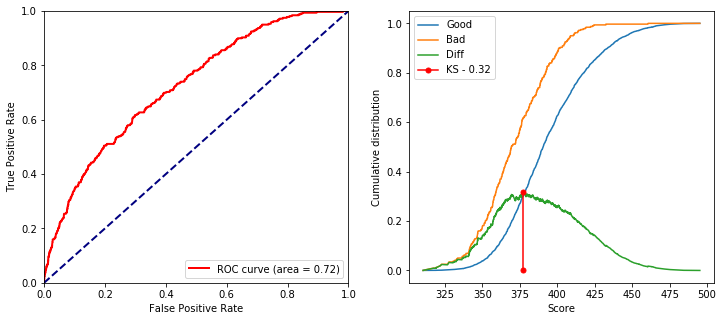

,Count,Cum. count,Goods,Cum. goods,Bads,Cum. bads,Marginal badrate,Cum. badrate,Approval rate
Score,,,,,,,,,
300-320,8,8,4,4,4,4,0.500000,0.500000,0.998618
320-340,79,87,61,65,18,22,0.227848,0.252874,0.984971
340-360,557,644,471,536,86,108,0.154399,0.167702,0.888755
360-380,1405,2049,1307,1843,98,206,0.069751,0.100537,0.646053
380-400,1658,3707,1582,3425,76,282,0.045838,0.076072,0.359648
400-420,1086,4793,1054,4479,32,314,0.029466,0.065512,0.172050
420-440,610,5403,606,5085,4,318,0.006557,0.058856,0.066678
440-460,280,5683,280,5365,0,318,0.000000,0.055956,0.018311
460-480,95,5778,94,5459,1,319,0.010526,0.055209,0.001900



 Test  Sample 



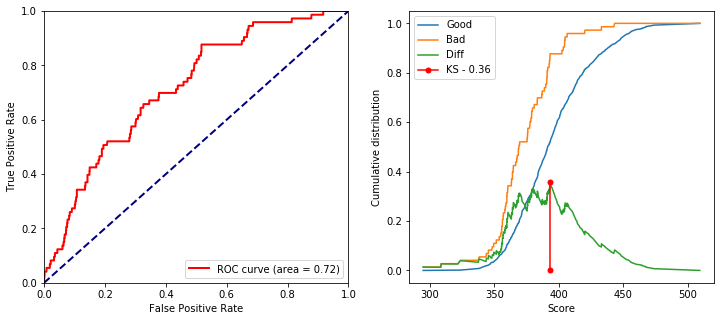

,Count,Cum. count,Goods,Cum. goods,Bads,Cum. bads,Marginal badrate,Cum. badrate,Approval rate
Score,,,,,,,,,
280-300,1,1,0,0,1,1,1.000000,1.000000,0.999309
300-320,2,3,1,1,1,2,0.500000,0.666667,0.997928
320-340,19,22,17,18,2,4,0.105263,0.181818,0.984807
340-360,146,168,127,145,19,23,0.130137,0.136905,0.883978
360-380,333,501,308,453,25,48,0.075075,0.095808,0.654006
380-400,409,910,393,846,16,64,0.039120,0.070330,0.371547
400-420,276,1186,270,1116,6,70,0.021739,0.059022,0.180939
420-440,133,1319,131,1247,2,72,0.015038,0.054587,0.089088
440-460,93,1412,92,1339,1,73,0.010753,0.051700,0.024862



 All  Sample 



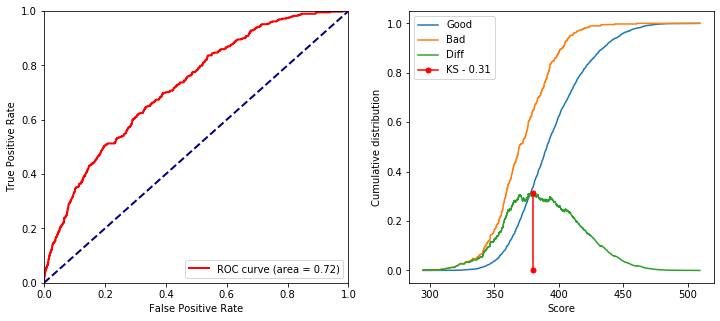

,Count,Cum. count,Goods,Cum. goods,Bads,Cum. bads,Marginal badrate,Cum. badrate,Approval rate
Score,,,,,,,,,
280-300,1,1,0,0,1,1,1.000000,1.000000,0.999862
300-320,10,11,5,5,5,6,0.500000,0.545455,0.998480
320-340,98,109,78,83,20,26,0.204082,0.238532,0.984939
340-360,703,812,598,681,105,131,0.149360,0.161330,0.887799
360-380,1738,2550,1615,2296,123,254,0.070771,0.099608,0.647644
380-400,2067,4617,1975,4271,92,346,0.044509,0.074940,0.362028
400-420,1362,5979,1324,5595,38,384,0.027900,0.064225,0.173829
420-440,743,6722,737,6332,6,390,0.008075,0.058018,0.071162
440-460,373,7095,372,6704,1,391,0.002681,0.055109,0.019621



 Method 2:  BE 0.15 


 Train  Sample 



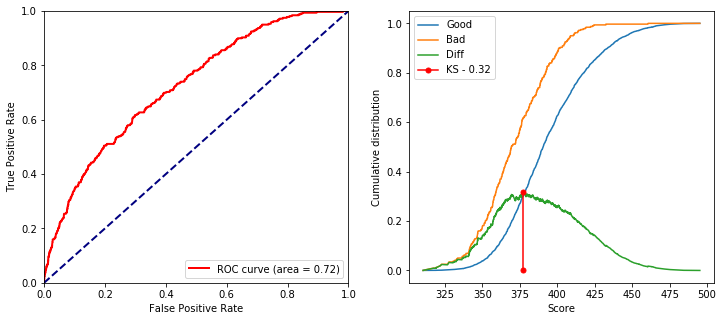

,Count,Cum. count,Goods,Cum. goods,Bads,Cum. bads,Marginal badrate,Cum. badrate,Approval rate
Score,,,,,,,,,
300-320,8,8,4,4,4,4,0.500000,0.500000,0.998618
320-340,79,87,61,65,18,22,0.227848,0.252874,0.984971
340-360,557,644,471,536,86,108,0.154399,0.167702,0.888755
360-380,1405,2049,1307,1843,98,206,0.069751,0.100537,0.646053
380-400,1658,3707,1582,3425,76,282,0.045838,0.076072,0.359648
400-420,1086,4793,1054,4479,32,314,0.029466,0.065512,0.172050
420-440,610,5403,606,5085,4,318,0.006557,0.058856,0.066678
440-460,280,5683,280,5365,0,318,0.000000,0.055956,0.018311
460-480,95,5778,94,5459,1,319,0.010526,0.055209,0.001900



 Test  Sample 



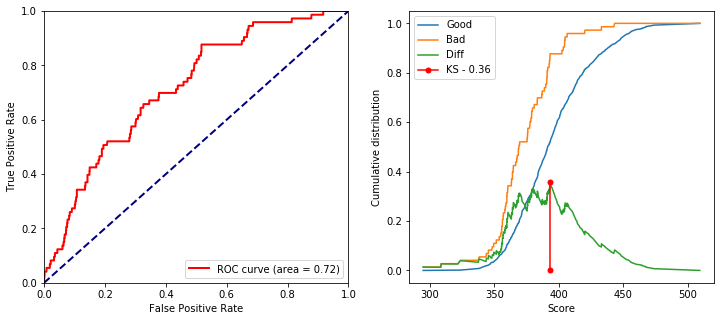

,Count,Cum. count,Goods,Cum. goods,Bads,Cum. bads,Marginal badrate,Cum. badrate,Approval rate
Score,,,,,,,,,
280-300,1,1,0,0,1,1,1.000000,1.000000,0.999309
300-320,2,3,1,1,1,2,0.500000,0.666667,0.997928
320-340,19,22,17,18,2,4,0.105263,0.181818,0.984807
340-360,146,168,127,145,19,23,0.130137,0.136905,0.883978
360-380,333,501,308,453,25,48,0.075075,0.095808,0.654006
380-400,409,910,393,846,16,64,0.039120,0.070330,0.371547
400-420,276,1186,270,1116,6,70,0.021739,0.059022,0.180939
420-440,133,1319,131,1247,2,72,0.015038,0.054587,0.089088
440-460,93,1412,92,1339,1,73,0.010753,0.051700,0.024862



 All  Sample 



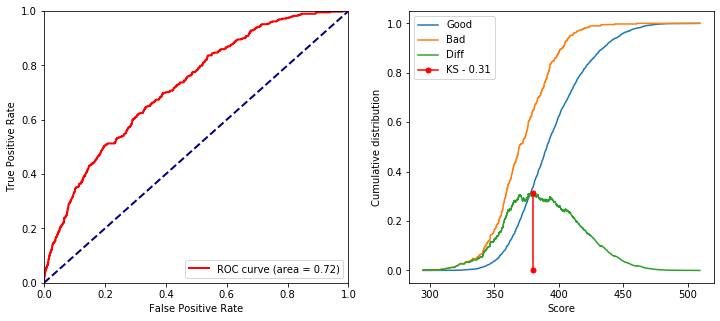

,Count,Cum. count,Goods,Cum. goods,Bads,Cum. bads,Marginal badrate,Cum. badrate,Approval rate
Score,,,,,,,,,
280-300,1,1,0,0,1,1,1.000000,1.000000,0.999862
300-320,10,11,5,5,5,6,0.500000,0.545455,0.998480
320-340,98,109,78,83,20,26,0.204082,0.238532,0.984939
340-360,703,812,598,681,105,131,0.149360,0.161330,0.887799
360-380,1738,2550,1615,2296,123,254,0.070771,0.099608,0.647644
380-400,2067,4617,1975,4271,92,346,0.044509,0.074940,0.362028
400-420,1362,5979,1324,5595,38,384,0.027900,0.064225,0.173829
420-440,743,6722,737,6332,6,390,0.008075,0.058018,0.071162
440-460,373,7095,372,6704,1,391,0.002681,0.055109,0.019621



 Method 3:  BE 0.1 


 Train  Sample 



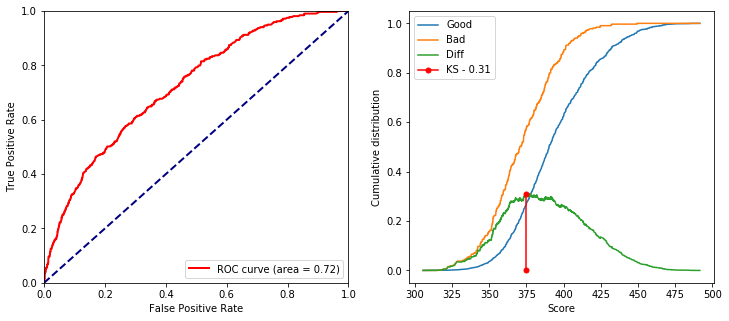

,Count,Cum. count,Goods,Cum. goods,Bads,Cum. bads,Marginal badrate,Cum. badrate,Approval rate
Score,,,,,,,,,
300-320,6,6,4,4,2,2,0.333333,0.333333,0.998964
320-340,80,86,60,64,20,22,0.250000,0.255814,0.985144
340-360,528,614,446,510,82,104,0.155303,0.169381,0.893937
360-380,1451,2065,1349,1859,102,206,0.070296,0.099758,0.643289
380-400,1633,3698,1557,3416,76,282,0.046540,0.076257,0.361202
400-420,1098,4796,1067,4483,31,313,0.028233,0.065263,0.171532
420-440,636,5432,631,5114,5,318,0.007862,0.058542,0.061669
440-460,282,5714,281,5395,1,319,0.003546,0.055828,0.012956
460-480,68,5782,68,5463,0,319,0.000000,0.055171,0.001209



 Test  Sample 



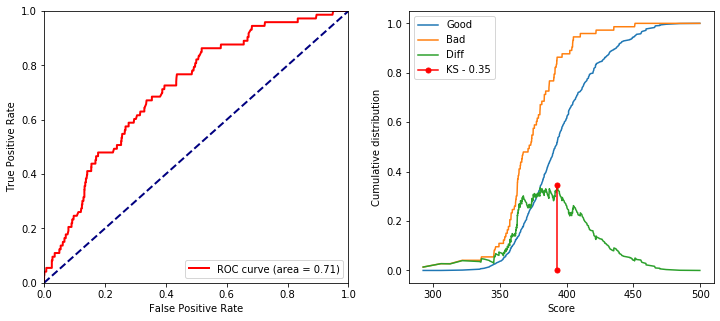

,Count,Cum. count,Goods,Cum. goods,Bads,Cum. bads,Marginal badrate,Cum. badrate,Approval rate
Score,,,,,,,,,
280-300,1,1,0,0,1,1,1.000000,1.000000,0.999309
300-320,2,3,1,1,1,2,0.500000,0.666667,0.997928
320-340,15,18,13,14,2,4,0.133333,0.222222,0.987569
340-360,141,159,127,141,14,18,0.099291,0.113208,0.890193
360-380,342,501,313,454,29,47,0.084795,0.093812,0.654006
380-400,409,910,392,846,17,64,0.041565,0.070330,0.371547
400-420,270,1180,264,1110,6,70,0.022222,0.059322,0.185083
420-440,156,1336,154,1264,2,72,0.012821,0.053892,0.077348
440-460,83,1419,82,1346,1,73,0.012048,0.051445,0.020028



 All  Sample 



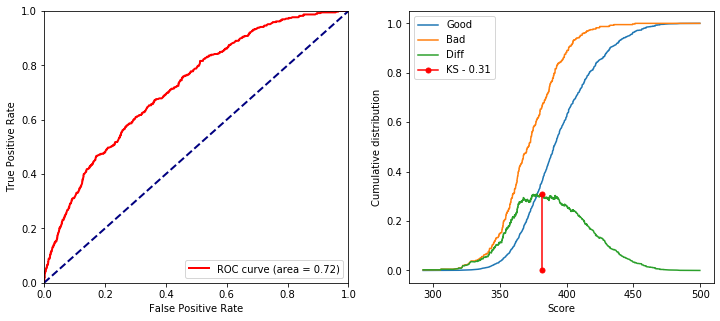

,Count,Cum. count,Goods,Cum. goods,Bads,Cum. bads,Marginal badrate,Cum. badrate,Approval rate
Score,,,,,,,,,
280-300,1,1,0,0,1,1,1.000000,1.000000,0.999862
300-320,8,9,5,5,3,4,0.375000,0.444444,0.998756
320-340,95,104,73,78,22,26,0.231579,0.250000,0.985629
340-360,669,773,573,651,96,122,0.143498,0.157827,0.893188
360-380,1793,2566,1662,2313,131,253,0.073062,0.098597,0.645433
380-400,2042,4608,1949,4262,93,346,0.045544,0.075087,0.363272
400-420,1368,5976,1331,5593,37,383,0.027047,0.064090,0.174243
420-440,792,6768,785,6378,7,390,0.008838,0.057624,0.064806
440-460,365,7133,363,6741,2,392,0.005479,0.054956,0.014371



 Method 4:  BE 0.05 


 Train  Sample 



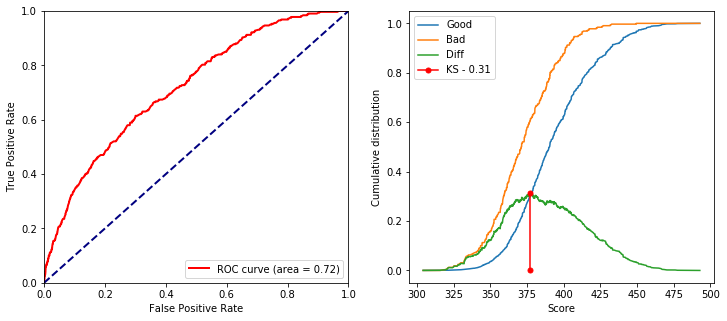

,Count,Cum. count,Goods,Cum. goods,Bads,Cum. bads,Marginal badrate,Cum. badrate,Approval rate
Score,,,,,,,,,
300-320,5,5,4,4,1,1,0.200000,0.200000,0.999136
320-340,71,76,49,53,22,23,0.309859,0.302632,0.986872
340-360,520,596,440,493,80,103,0.153846,0.172819,0.897046
360-380,1481,2077,1381,1874,100,203,0.067522,0.097737,0.641216
380-400,1622,3699,1545,3419,77,280,0.047472,0.075696,0.361030
400-420,1118,4817,1086,4505,32,312,0.028623,0.064771,0.167905
420-440,596,5413,590,5095,6,318,0.010067,0.058747,0.064951
440-460,314,5727,313,5408,1,319,0.003185,0.055701,0.010710
460-480,58,5785,58,5466,0,319,0.000000,0.055143,0.000691



 Test  Sample 



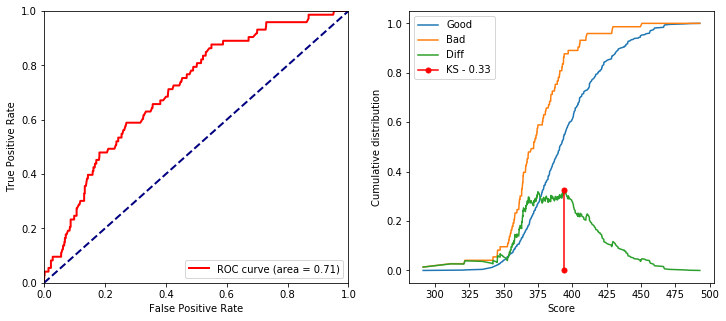

,Count,Cum. count,Goods,Cum. goods,Bads,Cum. bads,Marginal badrate,Cum. badrate,Approval rate
Score,,,,,,,,,
280-300,1,1,0,0,1,1,1.000000,1.000000,0.999309
300-320,2,3,1,1,1,2,0.500000,0.666667,0.997928
320-340,12,15,11,12,1,3,0.083333,0.200000,0.989641
340-360,147,162,132,144,15,18,0.102041,0.111111,0.888122
360-380,358,520,330,474,28,46,0.078212,0.088462,0.640884
380-400,387,907,368,842,19,65,0.049096,0.071665,0.373619
400-420,271,1178,266,1108,5,70,0.018450,0.059423,0.186464
420-440,154,1332,152,1260,2,72,0.012987,0.054054,0.080110
440-460,90,1422,89,1349,1,73,0.011111,0.051336,0.017956



 All  Sample 



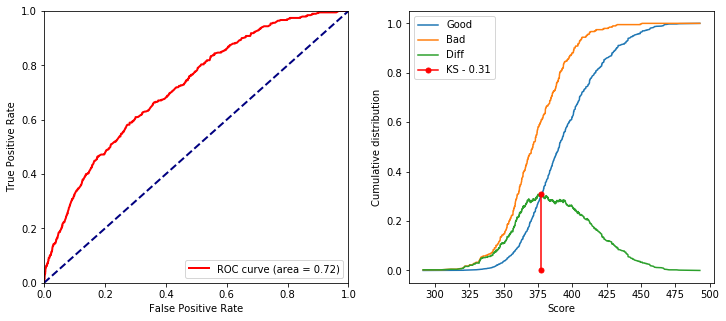

,Count,Cum. count,Goods,Cum. goods,Bads,Cum. bads,Marginal badrate,Cum. badrate,Approval rate
Score,,,,,,,,,
280-300,1,1,0,0,1,1,1.000000,1.000000,0.999862
300-320,7,8,5,5,2,3,0.285714,0.375000,0.998895
320-340,83,91,60,65,23,26,0.277108,0.285714,0.987426
340-360,667,758,572,637,95,121,0.142429,0.159631,0.895260
360-380,1839,2597,1711,2348,128,249,0.069603,0.095880,0.641150
380-400,2009,4606,1913,4261,96,345,0.047785,0.074902,0.363548
400-420,1389,5995,1352,5613,37,382,0.026638,0.063720,0.171618
420-440,750,6745,742,6355,8,390,0.010667,0.057821,0.067984
440-460,404,7149,402,6757,2,392,0.004950,0.054833,0.012160



 Method 5:  BE 0.01 


 Train  Sample 



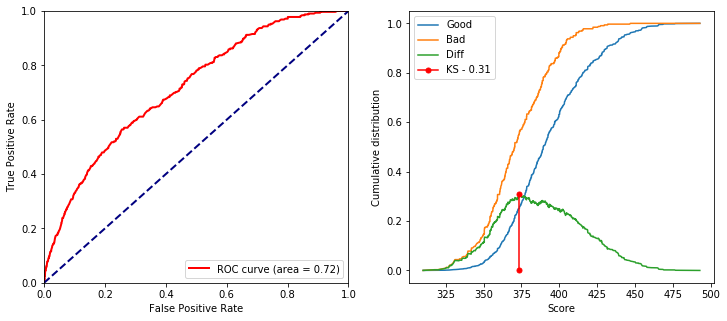

,Count,Cum. count,Goods,Cum. goods,Bads,Cum. bads,Marginal badrate,Cum. badrate,Approval rate
Score,,,,,,,,,
300-320,4,4,3,3,1,1,0.250000,0.250000,0.999309
320-340,76,80,52,55,24,25,0.315789,0.312500,0.986181
340-360,509,589,436,491,73,98,0.143418,0.166384,0.898255
360-380,1520,2109,1414,1905,106,204,0.069737,0.096728,0.635688
380-400,1627,3736,1550,3455,77,281,0.047326,0.075214,0.354638
400-420,1099,4835,1068,4523,31,312,0.028207,0.064529,0.164795
420-440,611,5446,605,5128,6,318,0.009820,0.058391,0.059250
440-460,278,5724,277,5405,1,319,0.003597,0.055730,0.011228
460-480,61,5785,61,5466,0,319,0.000000,0.055143,0.000691



 Test  Sample 



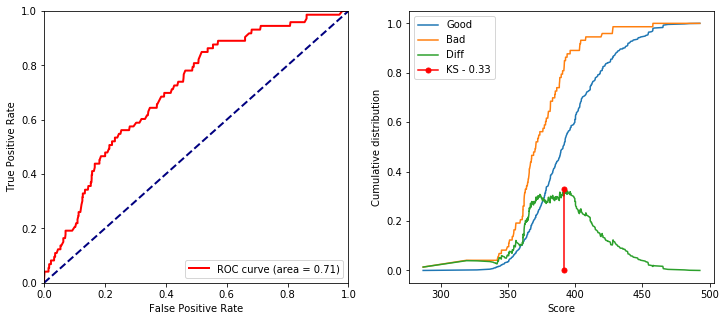

,Count,Cum. count,Goods,Cum. goods,Bads,Cum. bads,Marginal badrate,Cum. badrate,Approval rate
Score,,,,,,,,,
280-300,1,1,0,0,1,1,1.000000,1.000000,0.999309
300-320,4,5,2,2,2,3,0.500000,0.600000,0.996547
320-340,12,17,12,14,0,3,0.000000,0.176471,0.988260
340-360,136,153,124,138,12,15,0.088235,0.098039,0.894337
360-380,364,517,333,471,31,46,0.085165,0.088975,0.642956
380-400,388,905,369,840,19,65,0.048969,0.071823,0.375000
400-420,275,1180,271,1111,4,69,0.014545,0.058475,0.185083
420-440,156,1336,153,1264,3,72,0.019231,0.053892,0.077348
440-460,87,1423,86,1350,1,73,0.011494,0.051300,0.017265



 All  Sample 



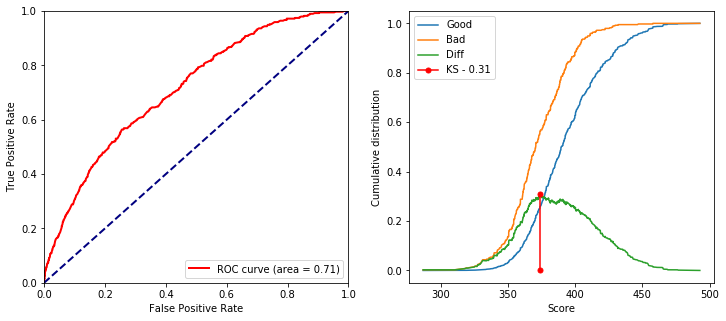

,Count,Cum. count,Goods,Cum. goods,Bads,Cum. bads,Marginal badrate,Cum. badrate,Approval rate
Score,,,,,,,,,
280-300,1,1,0,0,1,1,1.000000,1.000000,0.999862
300-320,8,9,5,5,3,4,0.375000,0.444444,0.998756
320-340,88,97,64,69,24,28,0.272727,0.288660,0.986597
340-360,645,742,560,629,85,113,0.131783,0.152291,0.897471
360-380,1884,2626,1747,2376,137,250,0.072718,0.095202,0.637142
380-400,2015,4641,1919,4295,96,346,0.047643,0.074553,0.358712
400-420,1374,6015,1339,5634,35,381,0.025473,0.063342,0.168854
420-440,767,6782,758,6392,9,390,0.011734,0.057505,0.062871
440-460,365,7147,363,6755,2,392,0.005479,0.054848,0.012436



 Summary


,BE 0.2,BE 0.15,BE 0.1,BE 0.05,BE 0.01
AUC_Train,0.723579,0.723579,0.722565,0.718633,0.715615
KS_Train,0.318652,0.318652,0.309344,0.314054,0.308505
AUC_Test,0.716448,0.716448,0.713888,0.708299,0.707970
KS_Test,0.359621,0.359621,0.345196,0.326894,0.331497
AUC_All,0.722157,0.722157,0.721013,0.716779,0.714303
KS_All,0.312824,0.312824,0.309048,0.309183,0.308407


In [452]:
#这一步是判断三种变量输入方法下最终得到的变量是否一样，如果一样的话就不用全部输出了
varList = []
for method in methodDict:
    varList.append(methodDict[method][0])
if all(set(x) == set(varList[0]) for x in varList):
    methodList = [list(methodDict.keys())[0]]
else:
    methodList = list(methodDict.keys())

#开始输出
statsDict = {method:{} for method in methodList}
X_df = [X_train_df, X_test_df,X_all_df]
Y_df = [Y_train, Y_test, Y_all]
sample = ['Train','Test','All']
methodCnt = 0

factor = 28.85
offset = 300
sign = (' %d + '% offset if offset != 0 and factor > 0 else ' ')
print('\n', 'Score =' , sign, '%d * ln(P(Good) / P(Bad))' % factor,'\n')

for method in methodList:
    methodCnt += 1
    print('\n','Method %d: '% methodCnt,method,'\n')
    
    for i in range(len(sample)):
        print('\n',sample[i],' Sample','\n')
        enteredList = methodDict[method][0]
        logit = methodDict[method][1]
        X_reg = sm.add_constant(X_df[i][enteredList].values).astype(float)
        Y_pred = logit.predict(X_reg)    
        fpr,tpr,threshold = roc_curve(Y_df[i], Y_pred)
        roc_auc = auc(fpr,tpr)
        ks = max(abs(fpr-tpr))
    
        odds =   (1-threshold) / threshold
        scores = offset + factor * np.log(odds)
        
        #画ROC图
        plt.figure(figsize = (12,5))
        plt.subplot(1,2,1)
        plt.plot(fpr, tpr, color='r',
         lw = 2, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
        plt.plot([0, 1], [0, 1], color='navy', lw = 2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc="lower right")
        
        #画KS
        plt.subplot(1,2,2)
        plt.plot(scores,fpr, label='Good')
        plt.plot(scores,tpr, label='Bad')
        plt.plot(scores,abs(fpr-tpr), label='Diff')
        # 标记ks
        ks_value = max(abs(fpr-tpr))
        idx = np.argwhere(abs(fpr-tpr) == ks_value)[0, 0]
        plt.plot((scores[idx], scores[idx]), (0, ks_value), label='KS - {:.2f}'.format(ks_value), 
                 color='r', marker='o', markerfacecolor='r', markersize=5)
        plt.xlabel('Score')
        plt.ylabel('Cumulative distribution')
        plt.legend()
        plt.show()
    
        statsDict[method]['AUC_'+sample[i]] = roc_auc
        statsDict[method]['KS_'+sample[i]] = ks
        
        #导出Gains chart
        gainsChart = pd.DataFrame(Y_df[i],columns = ['Bads'])
        gainsChart['Count'] = 1
        gainsChart['Goods'] = gainsChart['Count'] - gainsChart['Bads']
        gainsChart['Score'] = offset + factor * np.log((1 - Y_pred) / Y_pred)
        bins, labels = getBins(gainsChart['Score'],20)
        gainsChart['Score'] = pd.cut(gainsChart['Score'], bins = bins, labels = labels)
        gainsChart = gainsChart.groupby('Score').sum()
        gainsChart['Marginal badrate'] = gainsChart['Bads'] / gainsChart['Count']
        gainsChart['Cum. count'] = gainsChart['Count'].cumsum()
        gainsChart['Cum. goods'] = gainsChart['Goods'].cumsum()
        gainsChart['Cum. bads'] = gainsChart['Bads'].cumsum()
        gainsChart['Cum. badrate'] = gainsChart['Cum. bads'] / gainsChart['Cum. count']
        gainsChart['Approval rate'] = 1- gainsChart['Cum. count'] / gainsChart['Cum. count'][-1]
        gainsChart = gainsChart[['Count','Cum. count','Goods','Cum. goods','Bads','Cum. bads',
                                 'Marginal badrate','Cum. badrate','Approval rate']]
        display(gainsChart)
        
print('\n','Summary')
statsDf = pd.DataFrame(statsDict)
display(statsDf)

## 3. Final scorecard production

In [449]:
KSDf = statsDf.loc[['KS_Train','KS_Test'],:].T
KSDf['KS_Diff'] = abs(KSDf['KS_Train'] - KSDf['KS_Test'])
KSDf = KSDf.sort_values('KS_Diff')
bestMethod = KSDf.index[0]
print('Best method: ',bestMethod,', KS_diff = %.2f' % KSDf['KS_Diff'][0])
finalList = methodDict[bestMethod][0]
betas = methodDict[bestMethod][1].params
betaDf = pd.DataFrame(betas,index = ['const'] + finalList, columns = ['Beta']).T

Best method:  BE 0.05 , KS_diff = 0.01


In [450]:
n = len(finalList)
scoreCard_raw = pd.DataFrame(columns = ['Characteristic','Attribute','WOE','Score'])
for name in finalList:
    scoreCard_x = pd.DataFrame(woeMap[name], index = ['WOE']).T
    scoreCard_x = scoreCard_x.rename(columns = {'index':'Attribute'})
    scoreCard_x['Characteristic'] = name
    scoreCard_x['Score'] = - (scoreCard_x['WOE'].values * betaDf[name][0] + betaDf['const'][0] / n) * factor + offset / n
    if name in gpDict:
        if gpDict[name][0] == 'map':
            mapDf = pd.DataFrame(gpDict[name][1], index = ['Group']).T
            for group in scoreCard_x.index:
                scoreCard_x.loc[group,'Attribute'] = str(mapDf[mapDf.iloc[:,0] == group].index.to_list())
        elif gpDict[name][0] == 'bin':
            scoreCard_x['Attribute'] = pd.Series(scoreCard_x.index.to_list(),
                                                 index = scoreCard_x.index).apply(lambda x: x[2:-1])
    else:
        scoreCard_x['Attribute'] = scoreCard_x.index.to_list()
    scoreCard_raw = pd.concat([scoreCard_raw,scoreCard_x])
scoreCard_out = scoreCard_raw.reset_index().drop('index',axis = 1)[['Characteristic','Attribute','WOE','Score']]
scoreCard_out = scoreCard_out.set_index(['Characteristic','Attribute'])

In [451]:
scoreCard_out

WOE      Score
Characteristic Attribute                       
x30            0            7.567391  49.466635
               1          -34.001393  40.230053
x28            0          -17.899037  41.759502
               1           16.522726  53.347488
x25            <=23        53.449650  64.896607
               <=30        10.891262  51.271905
               <=53       -11.643673  44.057539
               >53        -71.994573  24.736716
x8             1-4         60.572400  74.055621
               5-6         25.422000  58.810770
               7-8          1.216741  48.312866
               9-10       -22.710843  37.935389
x20            1            7.864672  49.722185
               2          -91.410175  25.271346
               3-5       -116.669250  19.050177
x17            10          80.754815  69.621948
               1-4         18.620978  52.820431
               5-6        -10.277145  45.006133
               7-9        -17.315496  43.102904
x19            1           26.122546  53.589823
               2          -37.265727  39.504384
               3-5        -46.977461  37.346350
x12            [1]        158.655326  91.739405
               [2]         57.153777  63.619177
               [3]        -21.492880  41.830722
               [4]        -32.631508  38.744851
               [5, 6, 7]  -43.399526  35.761654